
# IDS Assignment Part 1

This is the first part of the assignment in IDS 2023/2024.

Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading.
Provide your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. **Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting!** Additionally, please ensure that the code notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. **Ensure that all your claims are supported.**

Hint 2: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

**Student names and matriculation numbers**

1.) Yu-Ting Huang, 459114

2.) Yuan-Wey Wang, 458657

3.) Chieh-Ting Lin, 460730

# Table of Contents

**Re-Drive - A platform for selling your used car**

**Q1: Preprocessing the data set**

**Q2: Exploring the data set**
- **(a) Exploration of the target feature**
- **(b) Exploration of correlations**
    - (i) Correleation with numerical attributes
    - (ii) Univariate correlations with categorical attributes
    - (iii) Multivariate correlations with categorical attributes

**Q3: Predicting prices**
- **(a) Baseline**
- **(b) Prediction by classification**
    - (i) Price binning
    - (ii) Data transformation for decision trees
    - (iii) Model training
    - (iv) Price prediction
- **(c) Prediction by clustering**
    - (i) Data transformation for clustering
    - (ii) Computing the distance matrix
    - (iii) Applying DBSCAN
    - (iv) Price prediction
- **(d) Prediction by regression and with neural networks**
    - (i) Feature engineering
    - (ii) Feature selection
    - (iii) Data transformation for regression and neural networks
    - (iv) Model training function
    - (v) Linear regression
    - (vi) Regression with non-linear kernels
    - (vii) Neural networks
- **(e) Discussion**


**Q4: Predicting time-to-sale**
- **(a) Data preparation**
    - (i) Target feature creation
    - (ii) Sensitivity and specificity
    - (iii) Data transformation for classification problem
- **(b) Classifiers**
    - (i) Model training
    - (ii) Evaluation Part 1
    - (iii) Evaluation Part 2
- **(c) Discussion**


# ReDrive - A platform for selling your used car

You finally made it! After years of hard study, you finally obtained a degree in data science. Congratulations!

Having a passion for automotive technologies, you decided to combine that passion with your profound knowledge in data science. Together with your colleague N., who has a passion for sustainability, you founded **ReDrive** in the beginning of 2023, an online platform where people can sell their used cars.

The first months of your joint venture are going very well, and you are making good revenue. It is time now for you to apply your data science expertise to evaluate your business and to look for improvement potential. Your idea on that is to first explore the data, and then to see if you can create useful models for predicting car prices.

The dataset *used_cars.csv* contains information about cars that customers have sold or are trying to sell via ReDrive in 2023.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q1: Preprocessing the data set **[8 points]**

Using the file *used_cars.csv*, create a dataframe. **[1 point]**

In [35]:
# Your code here
used_cars = pd.read_csv('used_cars.csv')

Provide the names of all columns that contain NaN values. **[1 point]**

In [36]:
# Your code here
columns_with_nan = used_cars.columns[used_cars.isnull().any()].tolist()
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['fuel_type', 'accident', 'clean_title']


**Answer:**

*Your answer here*

Columns that contain NaN values: ['fuel_type', 'accident', 'clean_title']

Display all rows containing NaN values. **[1 point]**

In [37]:
# Your code here
rows_with_nan = used_cars[used_cars.isnull().any(axis=1)]
print("Rows with NaN values:", rows_with_nan)

Rows with NaN values:         brand                                         model  model_year  \
2       Lexus                                 RX 350 RX 350        2022   
4        Audi                     Q3 45 S line Premium Plus        2021   
5       Acura                                      ILX 2.4L        2016   
9       Tesla                       Model X Long Range Plus        2020   
10       Land  Rover Range Rover Sport 3.0 Supercharged HST        2021   
...       ...                                           ...         ...   
3962   Toyota                               4Runner TRD Pro        2021   
3991  Porsche                                 Cayenne Turbo        2020   
3993  Porsche                                 911 Carrera S        2021   
3996    Aston                    Martin DB7 Vantage Volante        2003   
4006  Porsche                                        Taycan        2022   

           milage fuel_type  \
2      22,372 mi.  Gasoline   
4       9,835 m

You investigate the NaN values further. You decide to map the NaN values from the clean_title column to "No". Also, you map the NaN values of the accident column to "Unknown". **[1 point]**

In [38]:
# Your code here
# Map NaN values from the 'clean_title' column to "No"
used_cars['clean_title'] = used_cars['clean_title'].fillna('No')

# Map NaN values of the 'accident' column to "Unknown"
used_cars['accident'] = used_cars['accident'].fillna('Unknown')

Finally, you investigate the NaN values of the fuel_type column. To do so, you inspect the unique values of that column. What is your observation? Which general type of engine is accociated with NaN values in the fuel_type column? **[1 point]**

In [39]:
#Your code here
unique_fuel_types = used_cars['fuel_type'].unique()
print("Unique values of fuel_types:", unique_fuel_types)

unique_engines_with_nan_fuel = used_cars[used_cars['fuel_type'].isnull()]['engine'].unique()
print("Unique engines associated with NaN in 'fuel_type':", unique_engines_with_nan_fuel)

Unique values of fuel_types: ['E85 Flex Fuel' 'Gasoline' 'Hybrid' nan 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
Unique engines associated with NaN in 'fuel_type': ['534.0HP Electric Motor Electric Fuel System'
 '536.0HP Electric Motor Electric Fuel System'
 '835.0HP Electric Motor Electric Fuel System'
 '620.0HP Electric Motor Electric Fuel System'
 '455.0HP Electric Motor Electric Fuel System'
 '670.0HP Electric Motor Electric Fuel System' 'Electric'
 '355.0HP Electric Motor Electric Fuel System'
 '329.0HP Electric Motor Electric Fuel System'
 '271.0HP Electric Motor Electric Fuel System' 'Standard Range Battery'
 '111.2Ah / FR 70kW / RR 160kW (697V)'
 '200.0HP Electric Motor Electric Fuel System'
 '425.0HP Electric Motor Electric Fuel System'
 '147.0HP Electric Motor Electric Fuel System'
 '107.0HP Electric Motor Electric Fuel System' 'Dual Motor - Standard'
 '403.0HP 2.0L Electric Motor Electric Fuel System'
 '290.0HP Electric Motor Electric Fuel System'
 '266.0HP Electric Mot

**Answer:**

*Your answer here*

Electric Fuel System and Batter are accociated with NaN values.

Based on your former findings, you decide to map the NaN values of the column fuel_type to a value. Choose a suitable value. **[1 point]**

In [40]:
# Your code here
used_cars['fuel_type'] = used_cars['fuel_type'].fillna('Electric')

You investigate the other values of the fuel_type column. You decide to remove entries that either have *'–'* or *'not supported'* as values. **[1 point]**

In [41]:
# Your code here
used_cars = used_cars[~used_cars['fuel_type'].isin(['–', 'not supported'])]

How many rows does your final dataframe have? Are there any NaN values left in the columns? **[1 point]**

In [42]:
# Your code here
final_row_count = used_cars.shape[0]
print("Final number of rows:", final_row_count)

remaining_nan_columns = used_cars.columns[used_cars.isnull().any()].tolist()
remaining_nan_count = used_cars.isnull().sum().sum()  # Total count of NaN values across all dataframe cells
print("Columns with remaining NaN values:", remaining_nan_columns)
print("Total remaining NaN values across dataframe:", remaining_nan_count)

Final number of rows: 3962
Columns with remaining NaN values: []
Total remaining NaN values across dataframe: 0


**Answer:**

*Your answer here*

There are 3962 rows in my final dataframe and none of values is NaN in my final dataframe.

# Q2: Exploring the dataset **[14 points]**

From now on, use the dataset `used_cars_preprocessed.csv`.

In [43]:
df = pd.read_csv("used_cars_preprocessed.csv")

In the following, you want to explore the dataset.

## (a) Exploration of the target feature **[4 points]**

You are interested in automatically determining the price of a sold car. To do so, you apply your data science knowledge on predictions. You first create a boxplot concerning the price to get an initial impression of the distribution of this attribute. The boxplot should also show the mean. Are there outliers? What can you say about the spread prices? In addition, provide the average price, first and third quartile, and the standard deviation.

**[3 points]**

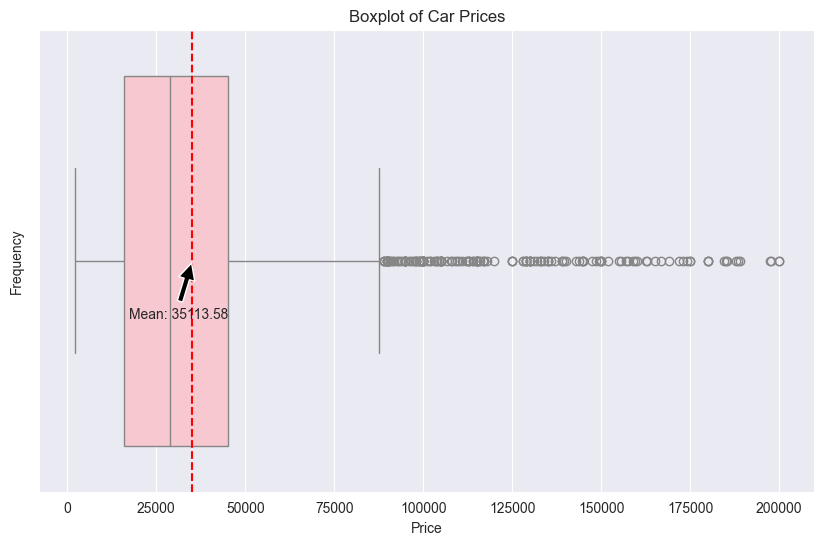

Mean Price: 35113.58227131124
Median Price: 28900.0
First Quartile: 16000.0
Third Quartile: 44998.5
Standard Deviation: 27683.727120951815


In [44]:
# Your code here

# Calculate statistics for 'price' column
mean_price = df['price'].mean()
median_price = df['price'].median()
quartile_1 = df['price'].quantile(0.25)
quartile_3 = df['price'].quantile(0.75)
std_dev = df['price'].std()

# Creating a boxplot for the 'price' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], color='pink')
plt.axvline(mean_price, color='r', linestyle='--')
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.annotate(f'Mean: {mean_price:.2f}', xy=(mean_price, 0), xytext=(mean_price+10000, 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='right', verticalalignment='top')

# Show the plot
plt.show()

# Print the calculated statistics
print("Mean Price:", mean_price)
print("Median Price:", median_price)
print("First Quartile:", quartile_1)
print("Third Quartile:", quartile_3)
print("Standard Deviation:", std_dev)


**Answer:**

*Your answer here*

Yes, there are many outliers. After generating the boxplot, look for points outside the whiskers. These points are considered outliers.

The boxplot indicates a wide spread in car prices, with a significant difference between the lower and upper quartiles, and a large standard deviation suggesting high variability in prices.

- Mean Price: $35,113.58

- Median Price: $28,900.00

- First Quartile (25th Percentile): $16,000.00

- Third Quartile (75th Percentile): $44,998.50

- Standard Deviation: $27,683.73


To get deeper insight into the price distribution, you decide to create a histogram. Choose an appropriate number of bins to get an informative plot. What do you observe?

**[1 point]**

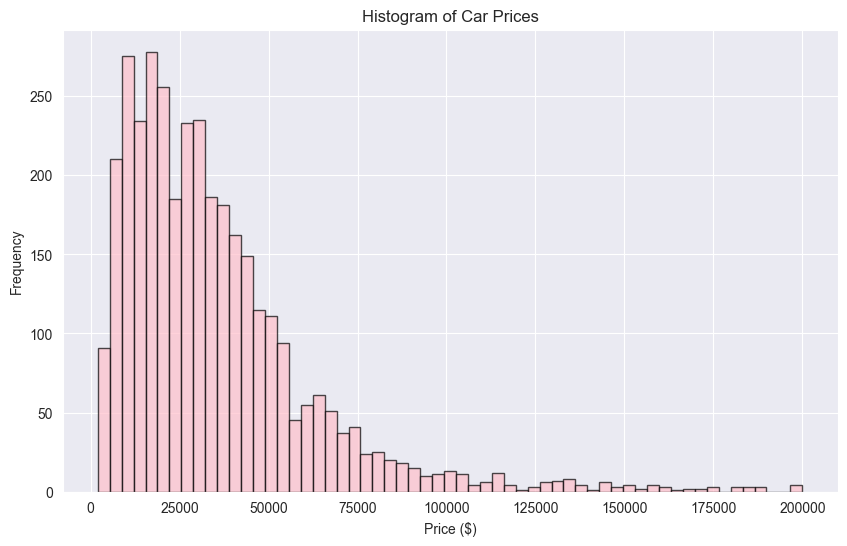

In [45]:
# Your code here
num_bins = int(np.sqrt(len(df['price'])))

plt.figure(figsize=(10, 6))
plt.hist(df['price'], color='pink', bins=num_bins, edgecolor='k', alpha=0.7)
plt.title('Histogram of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

**Answer:**

*Your answer here*

- Right-Skewed Distribution: The histogram shows a right-skewed (or positively skewed) distribution, meaning there are a significant number of cars with prices on the lower end of the scale, and fewer cars as the price increases.

- Common Price Range: The highest frequency of cars falls in the lower price range, suggesting that more affordable cars are common in this dataset.

- Presence of Outliers: The bars on the far right indicate that there are cars with prices significantly higher than the rest, which could be considered outliers.

## (b) Exploration of correlations **[10 points]**

Next, you want to investigate possible correlations of other variables with the target feature.

### (i) Correleation with numerical attributes

To do so, you create a correlation matrix of the numeric values of dataset. Intepret the correlation values you found between price and *model_year*, *milage*, *horsepower*, *litres*, and *cylinders*.

**[3 points]**

In [46]:
# Your code here

correlation_matrix = df[['price', 'model_year', 'milage', 'horsepower', 'litres', 'cylinders']].corr()
correlation_matrix

,price,model_year,milage,horsepower,litres,cylinders
price,1.000000,0.486867,-0.558964,0.545003,0.240132,0.308251
model_year,0.486867,1.000000,-0.586696,0.244959,-0.122781,-0.130185
milage,-0.558964,-0.586696,1.000000,-0.281965,0.087578,0.032671
horsepower,0.545003,0.244959,-0.281965,1.000000,0.537658,0.611432
litres,0.240132,-0.122781,0.087578,0.537658,1.000000,0.848685
cylinders,0.308251,-0.130185,0.032671,0.611432,0.848685,1.000000


**Answer:**

*Your answer here*

- Price and Model Year (0.486867): There is a moderate positive correlation between price and model year, indicating that newer models tend to be more expensive.

- Price and Mileage (-0.558964): There is a moderate negative correlation between price and mileage, suggesting that cars with higher mileage tend to be less expensive.

- Price and Horsepower (0.545003): There is a moderate positive correlation between price and horsepower, meaning that cars with more horsepower generally cost more.

- Price and Litres (0.240132): There is a weak positive correlation between price and engine size (litres), indicating that cars with larger engines tend to be slightly more expensive, but other factors might be more influential in determining the price.

- Price and Cylinders (0.308251): There is a weak to moderate positive correlation between price and the number of cylinders, suggesting that cars with more cylinders tend to have a higher price.

### (ii) Univariate correlations with categorical attributes

In the following, you consider the categorical attributes. You start with *brand*, *fuel_type*, *accident*, and *clean_title*. Create boxplots for these features to capture the relationship with *price*, also showing the mean. What do you observe? Are there feature values for which you can clearly identify a relationship to the price attribute? Also, comment on the outliers and potential distribution inside a value's prices. Be brief in your answers.

**[2.5 points]**

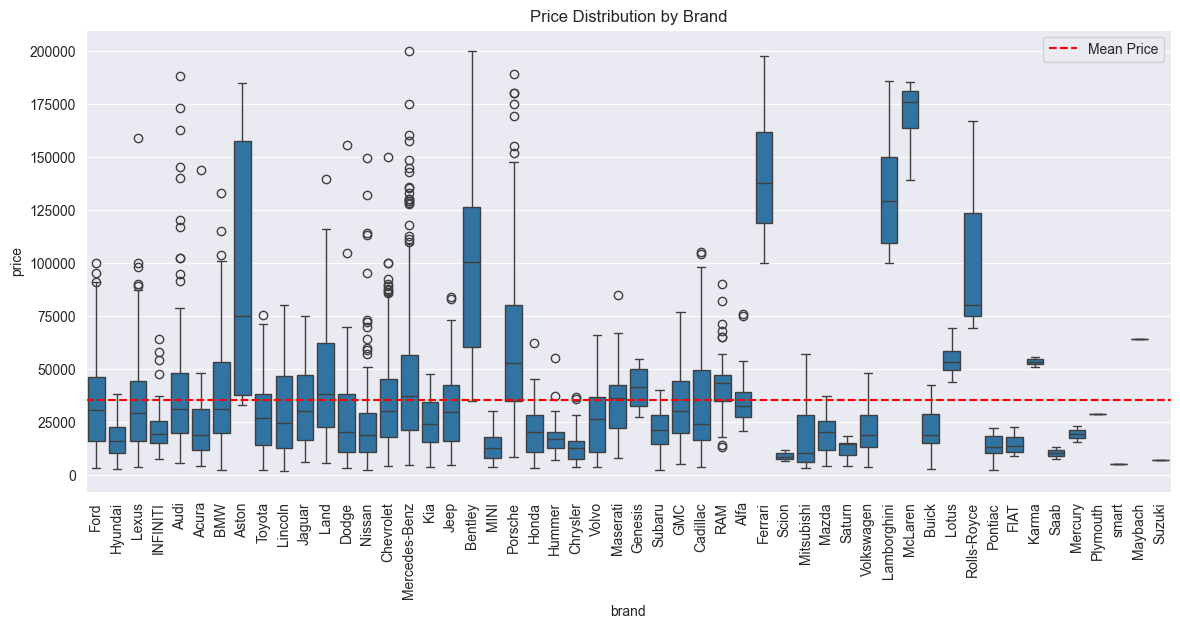

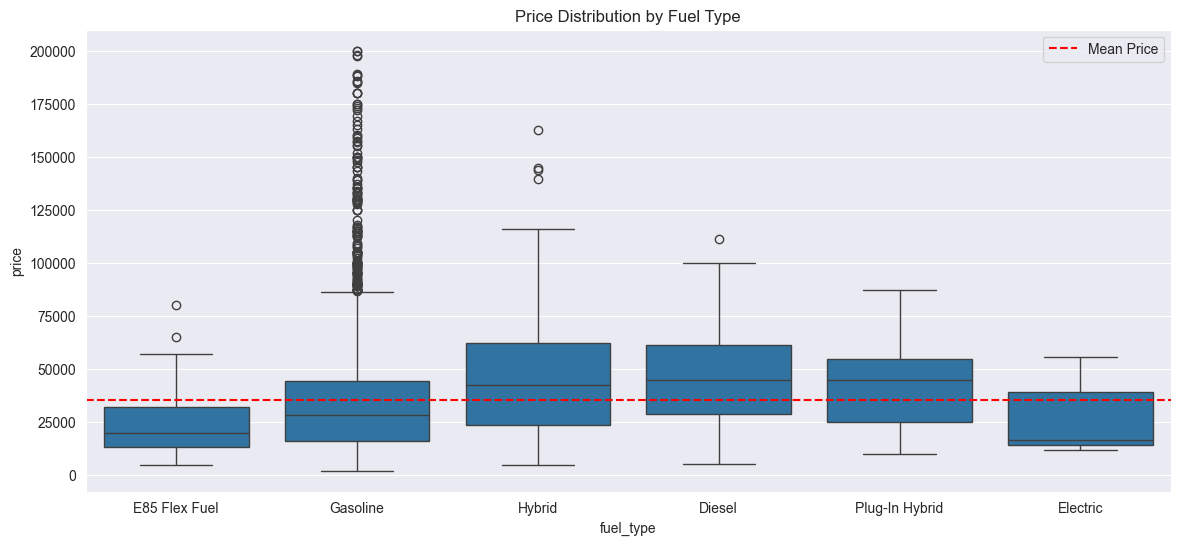

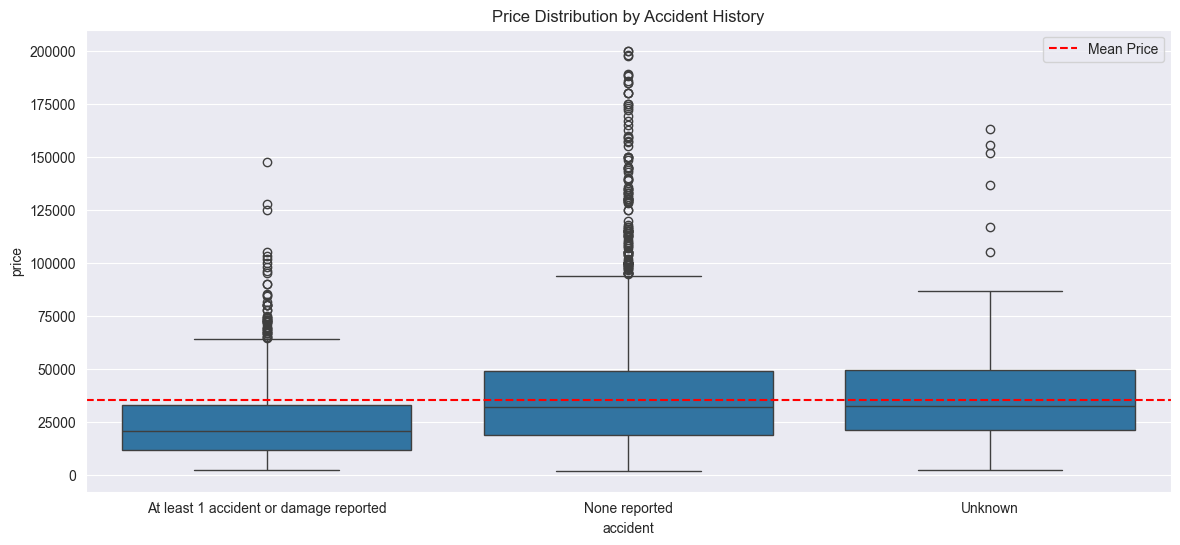

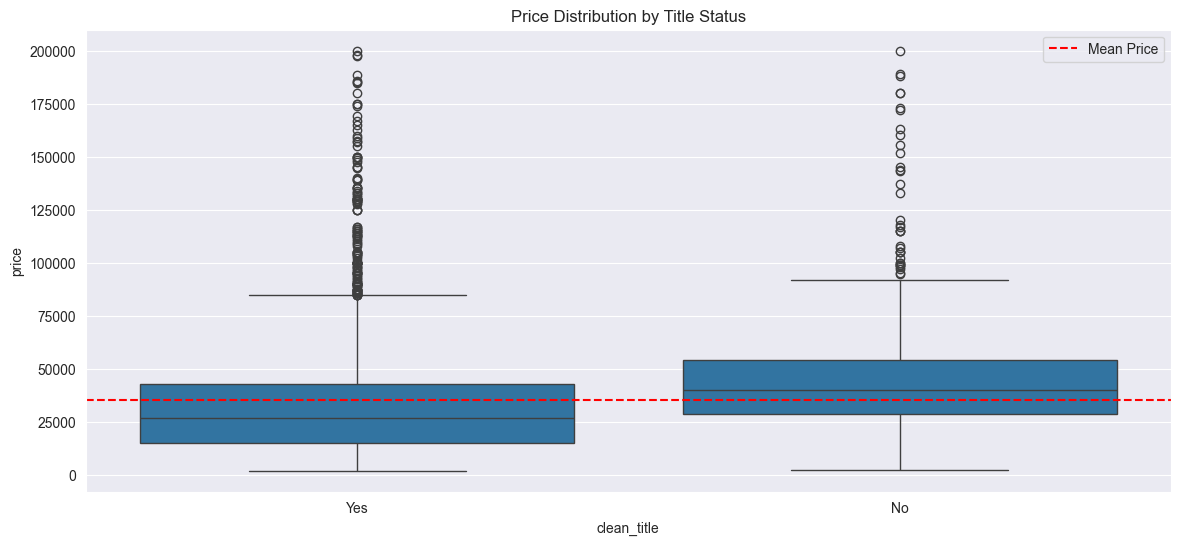

In [47]:
# Your code here

# Creating boxplots for categorical features and their relationship with price
plt.figure(figsize=(14, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand')
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='accident', y='price', data=df)
plt.title('Price Distribution by Accident History')
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='clean_title', y='price', data=df)
plt.title('Price Distribution by Title Status')
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.legend()
plt.show()


**Answer:**

*Your answer here*

- Brand: There is a variation in price distribution among different brands, which is expected as some brands are positioned as more premium or luxury compared to others. The mean price varies significantly across brands, and there are outliers for almost every brand, indicating some models are priced much higher than the typical range for that brand.

- Fuel Type: Different fuel types may have different average prices. The mean price line shows some variation among the groups. There might be a tendency for certain fuel types to be associated with either higher or lower prices.

- Accident History: Cars with reported accidents have a lower price distribution compared to those with no accidents, as shown by the position of the mean line within each category. This suggests a clear relationship where accident history negatively affects the car price.

- Clean Title: Cars with a clean title seem to have a higher mean price than those without, indicating a clean title is valued in the market.
For all features, the presence of outliers suggests that there are exceptions to the typical price ranges within each category. For example, even cars with an accident history or a non-clean title may have high prices, possibly due to other desirable features or attributes. These outliers indicate that while there is a general trend or relationship with price, individual car prices can vary greatly based on a combination of factors

### (iii) Multivariate correlations with categorical attributes

As the current analysis provides limited insight, you want to include a multivariate view using boxplots that also show the mean. Again, you decide on *brand*, *fuel_type*, *accident*, and *clean_title* as features. You create a boxplot for each pair of features with *price* still being your target. Based on these, provide a **superficial** conclusion. Each of the following cells focuses on one feature in particular.

*Hint*: You may want to use Seaborn's boxplot functionality while fixing the hue to each feature mentioned in the following cells (for inspiration, see, e.g., Seaborn's gallery: https://seaborn.pydata.org/examples/index.html)

**[2 points]**

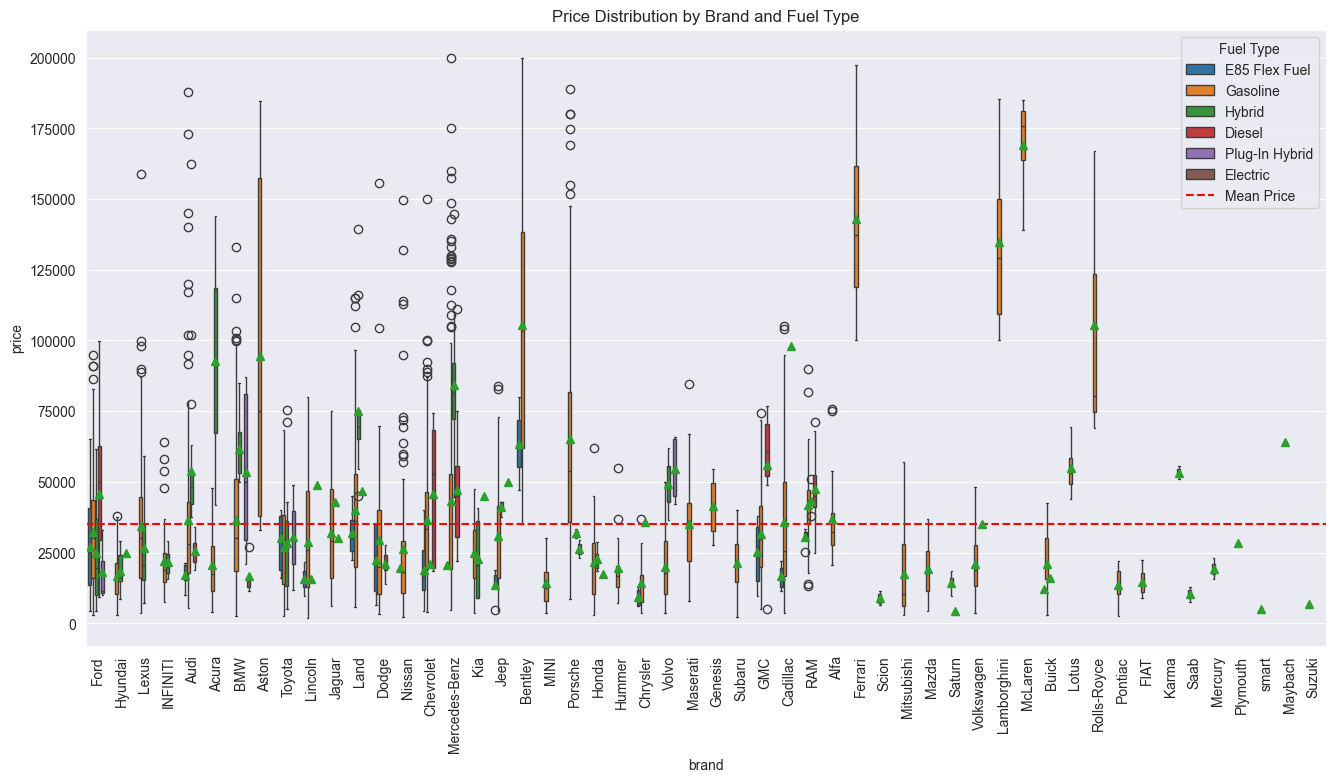

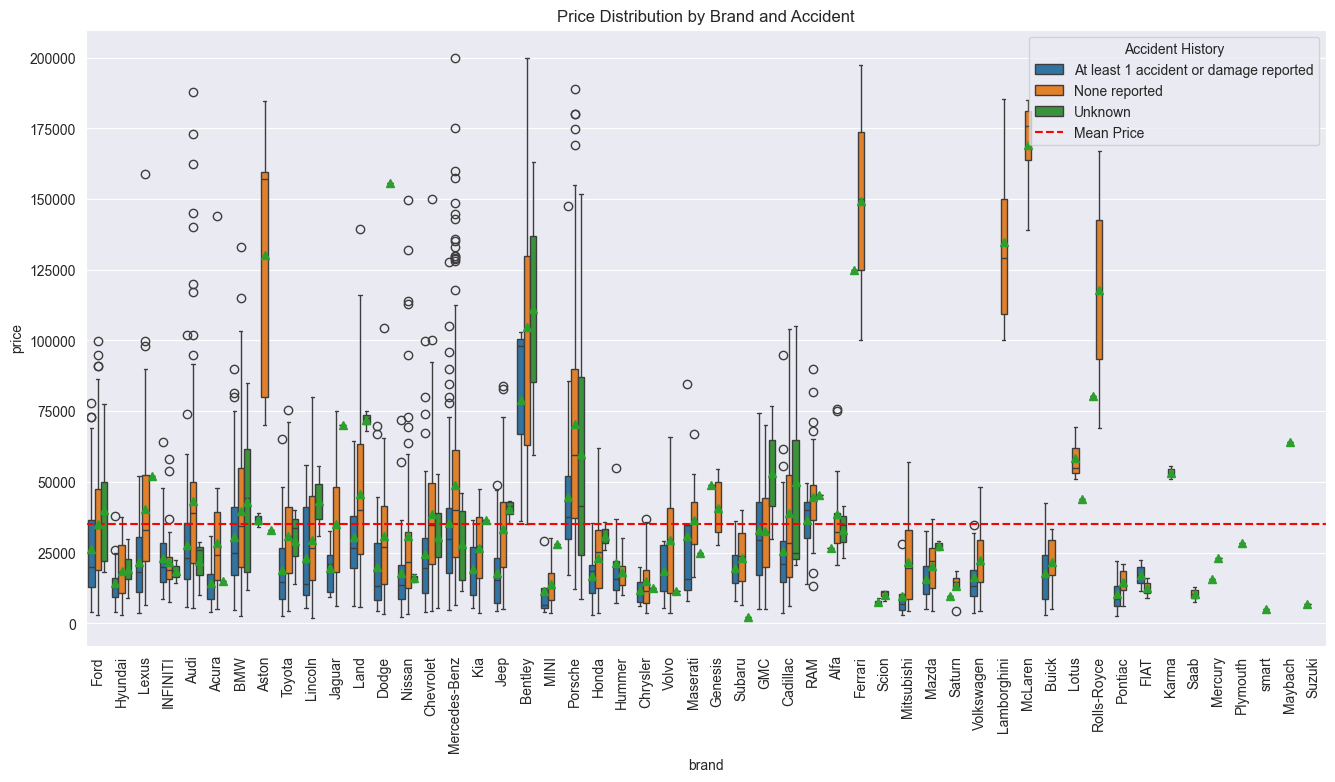

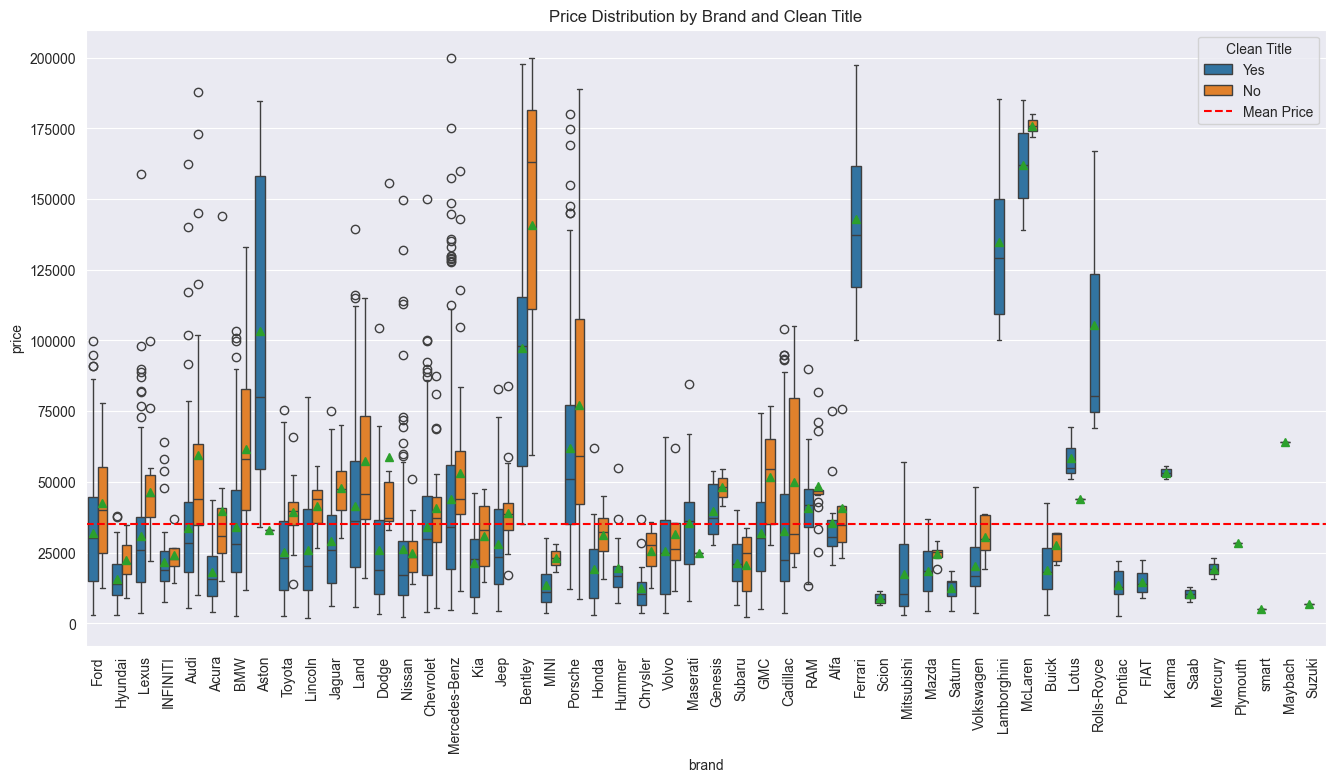

In [48]:
# Multivariate analysis for brand
# Your code goes here

# Multivariate analysis for brand with hue 'fuel_type'
plt.figure(figsize=(16, 8))
sns.boxplot(x='brand', y='price', hue='fuel_type', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand and Fuel Type')
plt.legend(title='Fuel Type', loc='upper right')
plt.show()

# Multivariate analysis for brand with hue 'accident'
plt.figure(figsize=(16, 8))
sns.boxplot(x='brand', y='price', hue='accident', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand and Accident')
plt.legend(title='Accident History', loc='upper right')
plt.show()

# Multivariate analysis for brand with hue 'clean_title '
plt.figure(figsize=(16, 8))
sns.boxplot(x='brand', y='price', hue='clean_title', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Brand and Clean Title')
plt.legend(title='Clean Title', loc='upper right')
plt.show()

**Answer: **[2 points]****

*Your answer here*

For the same brand,
- if the Fuel Type is Disesel, the price is higher.
- the price of None reported Accident History is higher,
- and the price without Clean Title is higher.

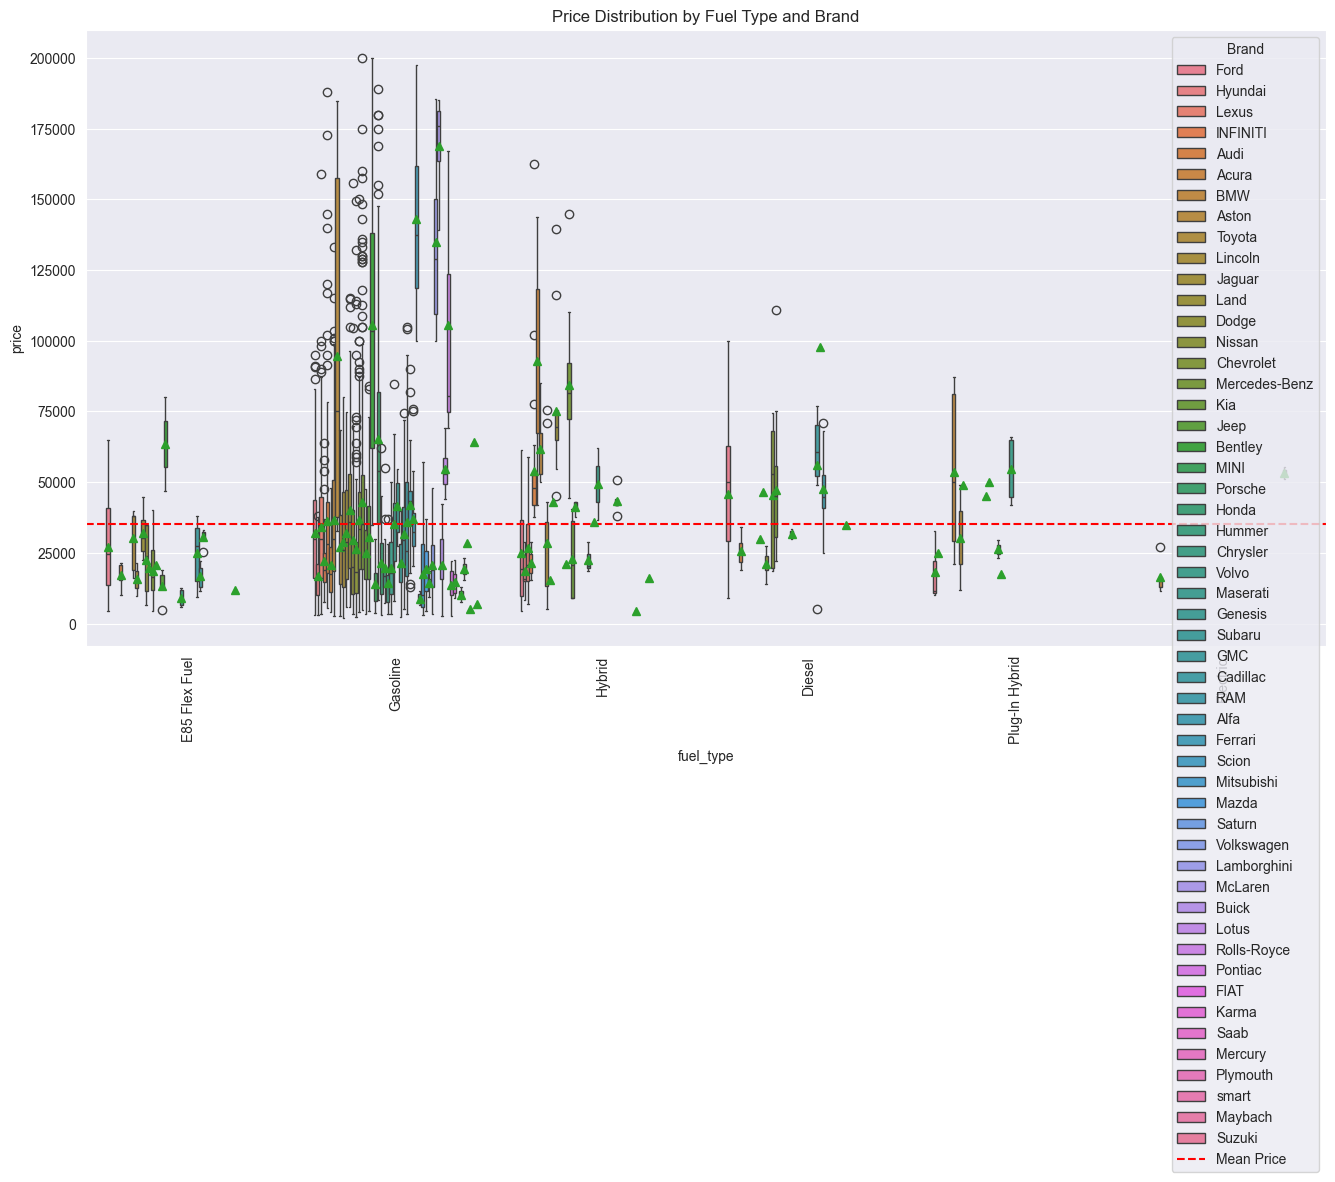

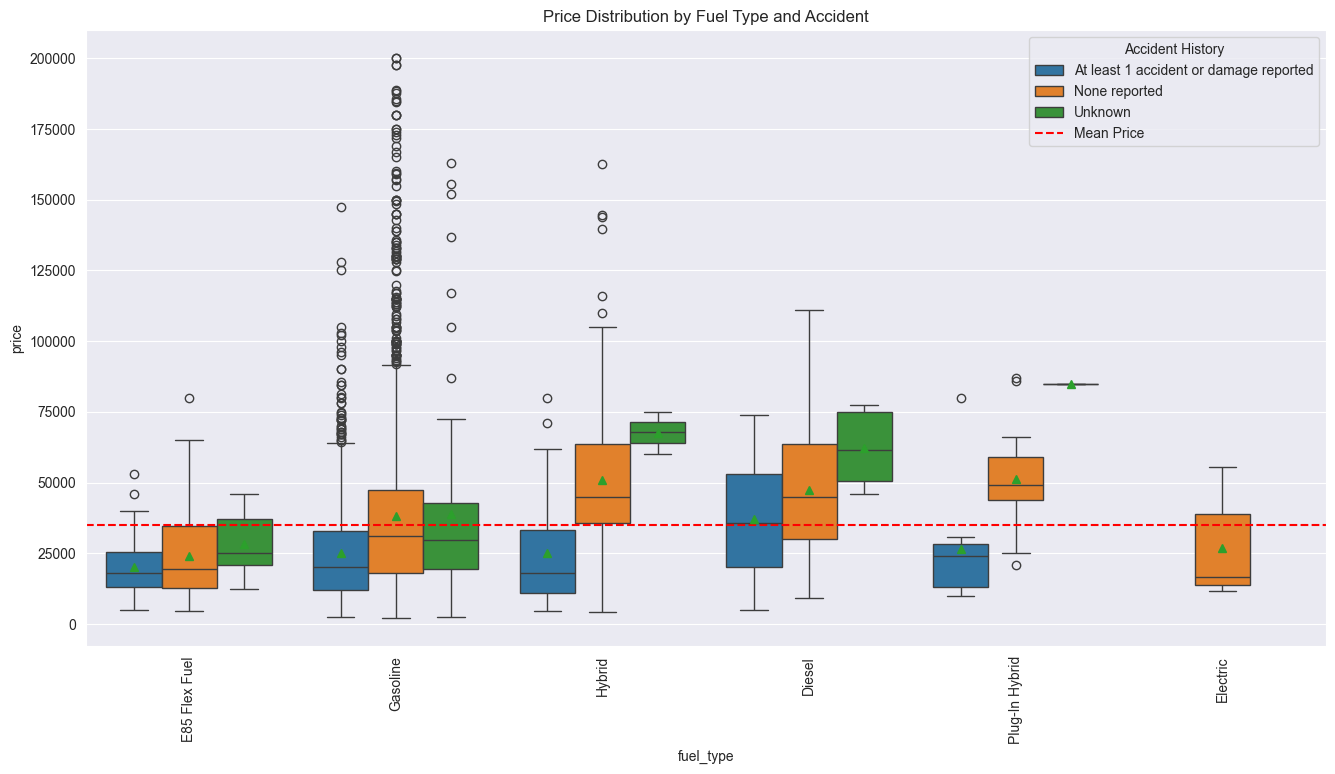

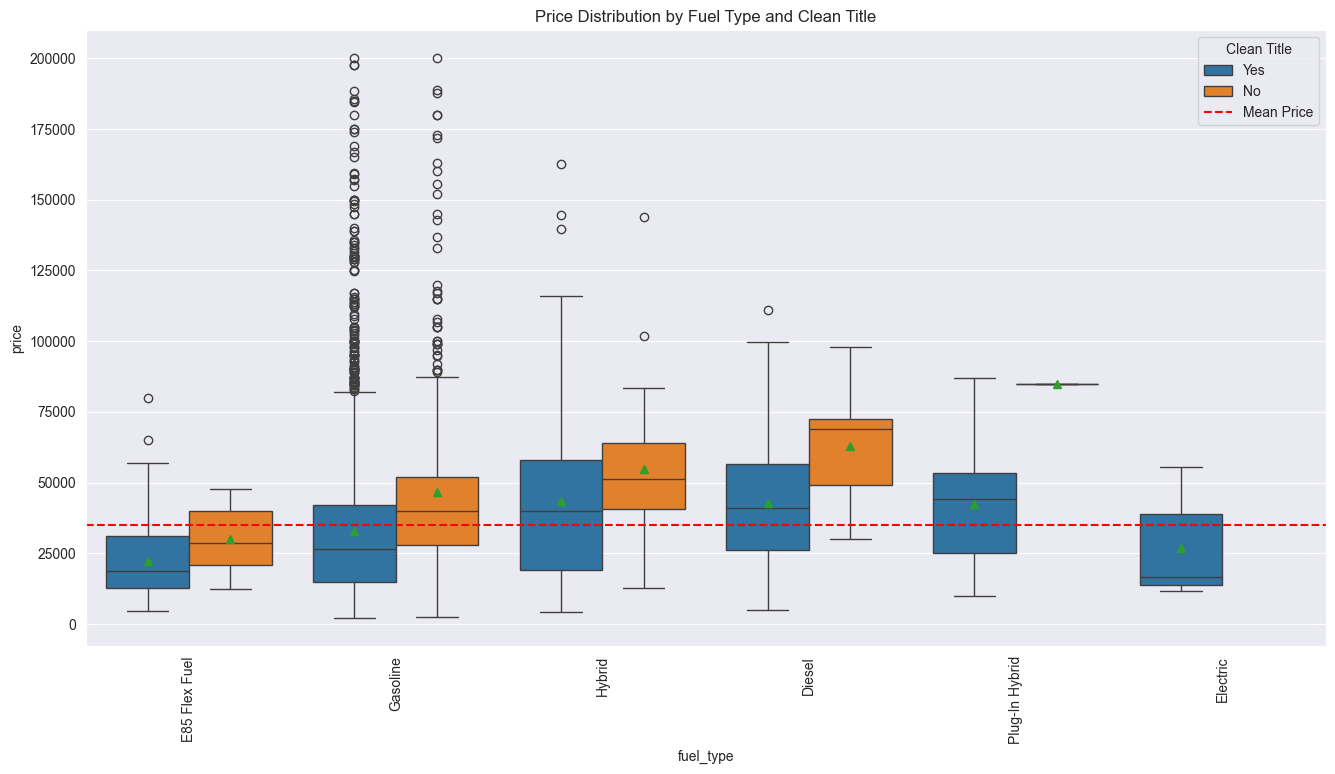

In [49]:
# Multivariate analysis for fuel_type
# Your code goes here

# Multivariate analysis for fuel_type with hue 'brand'
plt.figure(figsize=(16, 8))
sns.boxplot(x='fuel_type', y='price', hue='brand', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Fuel Type and Brand')
plt.legend(title='Brand', loc='upper right')
plt.show()

# Multivariate analysis for fuel_type with hue 'accident'
plt.figure(figsize=(16, 8))
sns.boxplot(x='fuel_type', y='price', hue='accident', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Fuel Type and Accident')
plt.legend(title='Accident History', loc='upper right')
plt.show()

# Multivariate analysis for fuel_type with hue 'clean_title '
plt.figure(figsize=(16, 8))
sns.boxplot(x='fuel_type', y='price', hue='clean_title', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Fuel Type and Clean Title')
plt.legend(title='Clean Title', loc='upper right')
plt.show()

**Answer: **[1.5 points]****

*Your answer here*

No matter what the Fuel Type is, the most obvious factors affecting the price will be lower if there is At least 1 accident or damage reported and a Clean Title.

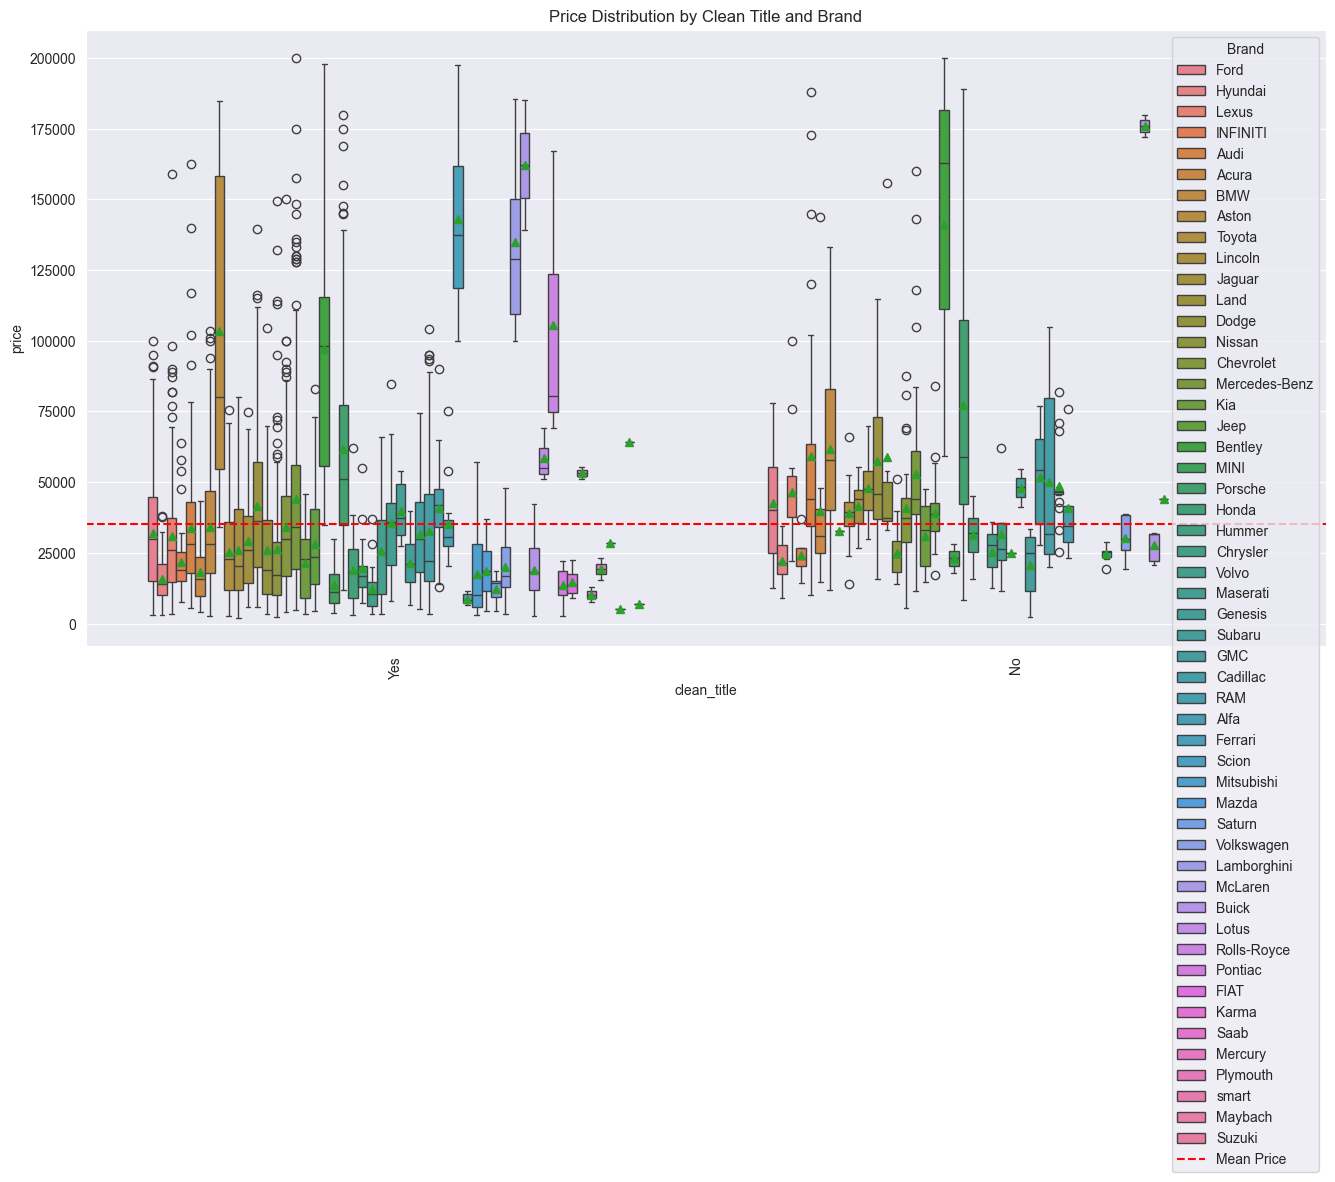

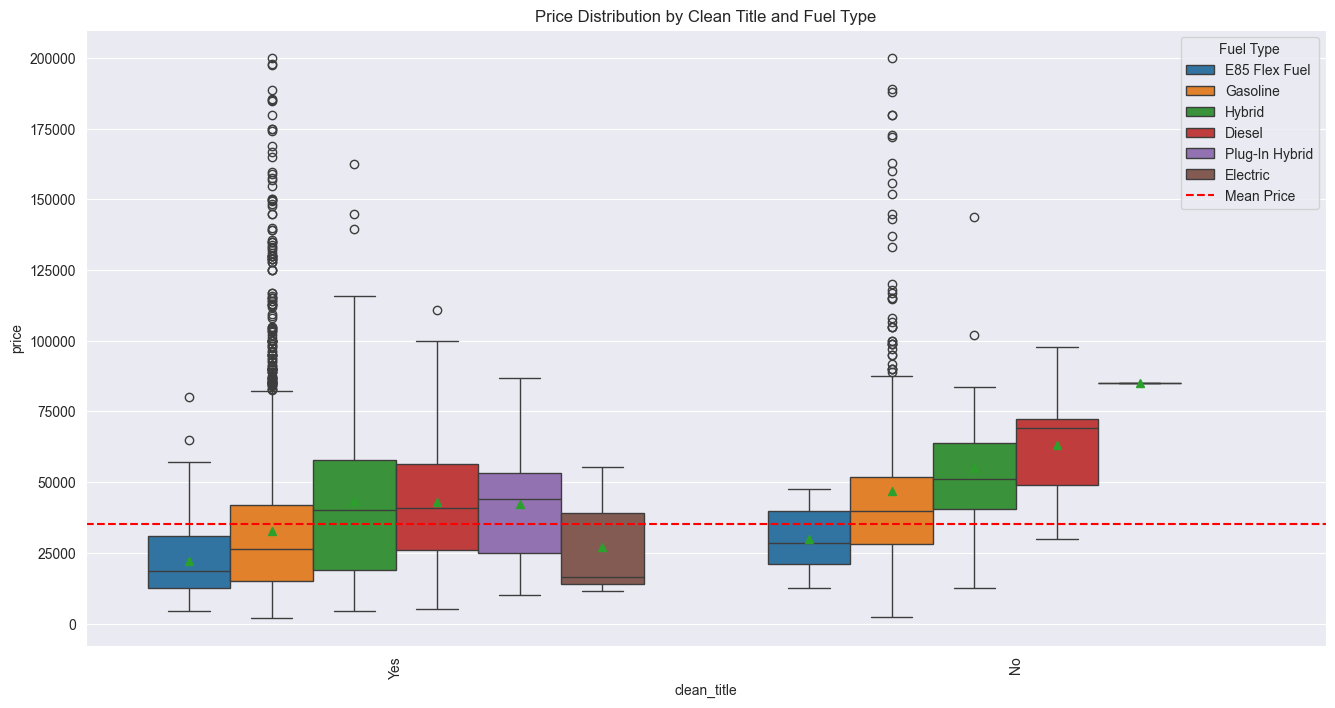

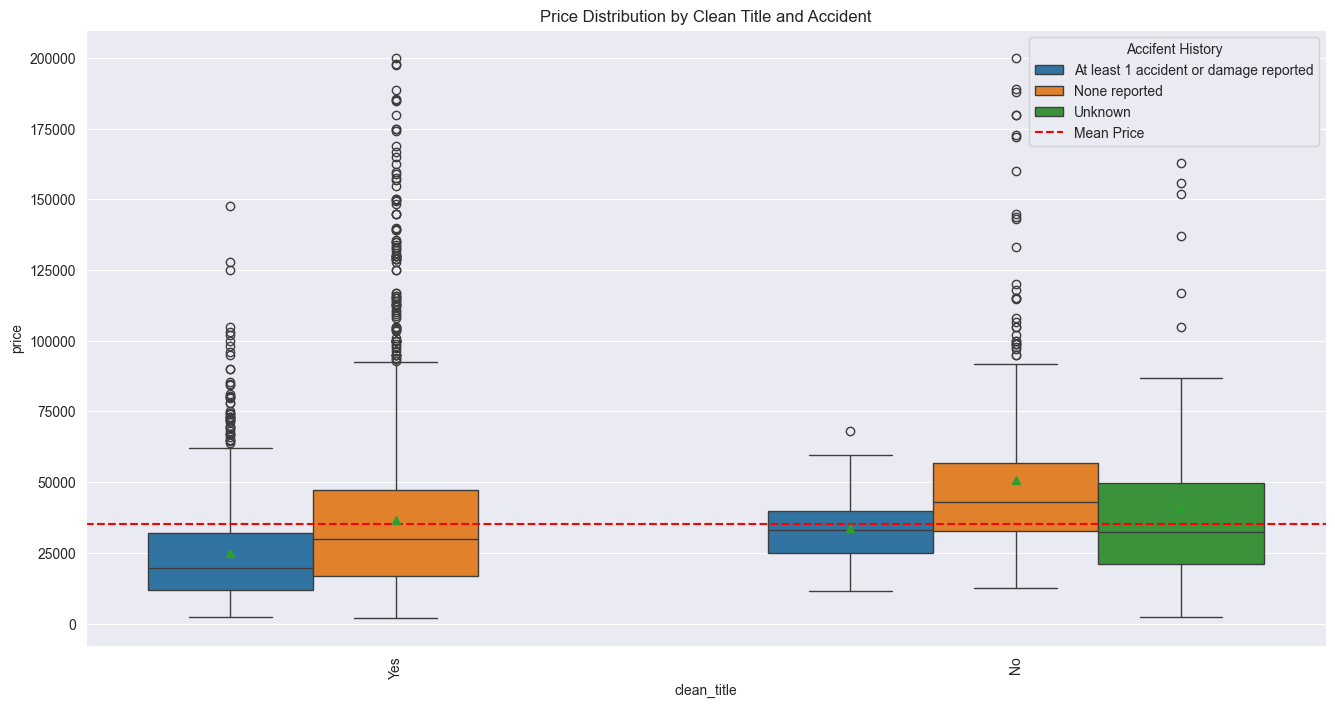

In [50]:
# Multivariate analysis for clean_title
# Your code goes here

# Multivariate analysis for clean_title with hue 'brand'
plt.figure(figsize=(16, 8))
sns.boxplot(x='clean_title', y='price', hue='brand', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Clean Title and Brand')
plt.legend(title='Brand', loc='upper right')
plt.show()

# Multivariate analysis for clean_title with hue 'fuel_type'
plt.figure(figsize=(16, 8))
sns.boxplot(x='clean_title', y='price', hue='fuel_type', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Clean Title and Fuel Type')
plt.legend(title='Fuel Type', loc='upper right')
plt.show()

# Multivariate analysis for clean_title with hue 'accident'
plt.figure(figsize=(16, 8))
sns.boxplot(x='clean_title', y='price', hue='accident', data=df, showmeans=True)
plt.axhline(df['price'].mean(), color='r', linestyle='--', label='Mean Price')
plt.xticks(rotation=90)
plt.title('Price Distribution by Clean Title and Accident')
plt.legend(title='Accifent History', loc='upper right')
plt.show()

**Answer: [1 point]**

*Your answer here*

For all factors, as long as there is no Clean Title it will be more expensive

# Q3: Predicting prices **[62 points]**

After a long day at the office, you and N. go to a local bar to catch up with your old friend W. Over a round of cold drinks, you begin to share the great news about your booming business. Being an expert in data analytics himself, W. is also curious to hear your plans to apply your data science knowledge.

"I've been thinking about selling my old Porsche to make room for a new one," W. says to you. "I'm wondering what price to set for the old one. This is the perfect opportunity for you to try out your new predictive models, don't you think?"

You agree! W. writes down the properties of his Porsche (in the following, also referred to as *target car*) on a napkin. You tell W. that you will call him as soon as you can make a confident estimate for the price of his car. The next morning, you immediately start working on predictive models for car prices.
If not sated otherwise, you use the entire pre-processed dataset to create each of the models - load the dataset new at the beginning of every partial question a), b),...d) so you don't accidentally use data you have changed for a different kind of model.


In [51]:
car = pd.DataFrame([{
      "brand": "Porsche",
      "model":  "911 Carrera S",
      "model_year": 2015,
      "milage": 84500.0,
      "fuel_type": "Gasoline",
      "engine": "400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel",
      "transmission": "7-Speed A/T",
      "ext_col": "Black",
      "int_col": "Black",
      "accident": "None reported",
      "clean_title": "Yes",
      "horsepower": 400.0,
      "litres": 3.8,
      "cylinders": 6.0
}])

## (a) Baseline **[2 points]**

First, you want to set a baseline to compare against. The baseline should always use the average price of all cars as a recommended price. Use the pre-processed dataset and the `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. To stay consistent, the same split between training and test set should be used throughout the entire assignment.

What are the values of the mean absolute error and the root-mean-squared error?

**[2 points]**

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
# Your code here
df = pd.read_csv("used_cars_preprocessed.csv")
train, test = train_test_split(df, test_size=0.05, random_state=3)

average_price = train['price'].mean()
print(f"Average price( baseline ): {average_price:.2f}")

test_preds = [average_price] * len(test)

mae = mean_absolute_error(test['price'], test_preds)
rmse = np.sqrt(mean_squared_error(test['price'], test_preds))

print(f"Mean Absolute Error: {mae:.4f}, Root Mean Squared Error: {rmse:.4f}")

Average price( baseline ): 35025.15
Mean Absolute Error: 20509.6484, Root Mean Squared Error: 30579.4050


## (b) Prediction by classification **[16 points]**

Next, you try to price your car according to similar cars using a decision tree.

### (i) Price binning

In the following, we want to know the price ranges for selling cars. To use decision trees, you need to discretize prices. We use the following price bins:
- [1,800, 10,000]
- (10,000, 20,000]
- (20,000, 30,000]
- (30,000, 40,000]
- (40,000, 50,000]
- (50,000, 60,000]
- (60,000, 80,000]
- (80,000, 100,000]
- (100,000, 120,000]
- (120,000, 140,000]
- (140,000, 160,000]
- (160,000, 180,000]
- (180,000, 220,000]

Add the attribute *Price_Bins* to the entire pre-processed data set using the discretization mentioned above for each car. For example, if a car costs 2500, it is put into the bin [1,800, 10,000].

**[1 point]**

In [53]:
# Your code here
# Define the price bins
bins = [1800, 10000, 20000, 30000, 40000, 50000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 220000]

# Create a new column 'Price_Bins' with the corresponding bin for each car
first_bin = df['price'].between(bins[0], bins[1], inclusive='both')
df.loc[first_bin, 'Price_Bins'] = pd.Interval(left=bins[0], right=bins[1], closed='both')

# For the remaining bins, we will use the right bin boundary as the left boundary for the next bin
remaining_bins = bins[1:]
df.loc[~first_bin, 'Price_Bins'] = pd.cut(df.loc[~first_bin, 'price'], bins=remaining_bins, right=True)


# Print the unique values of the 'Price_Bins' column
df['Price_Bins'].unique()


array([Interval(10000, 20000, closed='right'),
       Interval(30000, 40000, closed='right'),
       Interval(50000, 60000, closed='right'),
       Interval(1800, 10000, closed='both'),
       Interval(40000, 50000, closed='right'),
       Interval(180000, 220000, closed='right'),
       Interval(60000, 80000, closed='right'),
       Interval(20000, 30000, closed='right'),
       Interval(140000, 160000, closed='right'),
       Interval(120000, 140000, closed='right'),
       Interval(80000, 100000, closed='right'),
       Interval(100000, 120000, closed='right'),
       Interval(160000, 180000, closed='right')], dtype=object)

You predicted a price range for cars. However, since you cannot enter a price range for selling a car, you have to map each bin to a value. To do so, you use the mean of bins to predict the price. For example, the bin (10,000, 20,000] is mapped to 15,000. Create a dictionary you can use for this mapping.

**[1 point]**

In [54]:
# Your code here
# Create a list of unique bins
unique_bins = df['Price_Bins'].unique()
unique_bins.sort()

# Create a dictionary to map the bins to their respective midpoint
bin_mapping = {interval: (interval.left + interval.right) / 2 for interval in unique_bins}

bin_mapping

{Interval(1800, 10000, closed='both'): 5900.0,
 Interval(10000, 20000, closed='right'): 15000.0,
 Interval(20000, 30000, closed='right'): 25000.0,
 Interval(30000, 40000, closed='right'): 35000.0,
 Interval(40000, 50000, closed='right'): 45000.0,
 Interval(50000, 60000, closed='right'): 55000.0,
 Interval(60000, 80000, closed='right'): 70000.0,
 Interval(80000, 100000, closed='right'): 90000.0,
 Interval(100000, 120000, closed='right'): 110000.0,
 Interval(120000, 140000, closed='right'): 130000.0,
 Interval(140000, 160000, closed='right'): 150000.0,
 Interval(160000, 180000, closed='right'): 170000.0,
 Interval(180000, 220000, closed='right'): 200000.0}

### (ii) Data transformation for decision trees

You want to apply a decision tree to predict the price. You decide to use *brand*, *fuel_type*, *model_year*, *accident* and *clean_title* as descriptive features and *Price_Bins* as the target feature.

You split the data into a train and test set. For the train-test split, use `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`

In order to apply the sklearn method for decision trees, you need to encode the categorical variables. For the encoding, use the `OneHotEncoder` from *sklearn* with `sparse_output=False`.
  
*Hint*: You later need the continous prices of your test set to compute errors, so better store them.

*Hint*: Applying `get_feature_names_out()` on your encoder provides you a list of columns after the transformation.

**[2 points]**

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
# Your code here
# # apply the bin_mapping dictionary to the 'Price_Bins' attribute
# df['Price_Bins'] = df['Price_Bins'].apply(lambda x: bin_mapping[x])
# print(df['Price_Bins'].unique())

# define the features and target
features = ['brand', 'fuel_type', 'model_year', 'accident', 'clean_title']
target = 'Price_Bins'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.05, random_state=3)

# extract the continuous price values from the testing sets
continuous_prices_test = test['price']

# encode the training and testing sets
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# display the number of rows and columns in the encoded training set
encoded_feature_names = encoder.get_feature_names_out(features)

### (iii) Model training

In the following, you want to use a good deicision tree for predicting prices. To do so,you want to test a set of different values, in particular, max depth of a tree. You test values in [1, 9] (in steps of size one).

You use the the algorithm from the *sklearn* library. You set as criterion "entropy", `min_samples_leaf=6`, and `random_state=42`.

Your goal is to minimize the mean absolute error. Create the prediction using the bins and only apply the dictionary mapping the bins to means to the predicted values before calculating the error.

Create a summarizing plot, in which the x-axis represents the maximum tree depth, and the y-axis the mean absolute error as well as the root-mean-square error.

**[5 points]**

In [56]:
[(y1, y2) for y1, y2 in zip(y_train, y_train.apply(lambda x: list(bin_mapping.keys()).index(x)))]

[(Interval(30000, 40000, closed='right'), 3),
 (Interval(30000, 40000, closed='right'), 3),
 (Interval(10000, 20000, closed='right'), 1),
 (Interval(60000, 80000, closed='right'), 6),
 (Interval(20000, 30000, closed='right'), 2),
 (Interval(10000, 20000, closed='right'), 1),
 (Interval(40000, 50000, closed='right'), 4),
 (Interval(40000, 50000, closed='right'), 4),
 (Interval(20000, 30000, closed='right'), 2),
 (Interval(1800, 10000, closed='both'), 0),
 (Interval(50000, 60000, closed='right'), 5),
 (Interval(10000, 20000, closed='right'), 1),
 (Interval(30000, 40000, closed='right'), 3),
 (Interval(20000, 30000, closed='right'), 2),
 (Interval(1800, 10000, closed='both'), 0),
 (Interval(80000, 100000, closed='right'), 7),
 (Interval(60000, 80000, closed='right'), 6),
 (Interval(10000, 20000, closed='right'), 1),
 (Interval(10000, 20000, closed='right'), 1),
 (Interval(30000, 40000, closed='right'), 3),
 (Interval(10000, 20000, closed='right'), 1),
 (Interval(60000, 80000, closed='righ

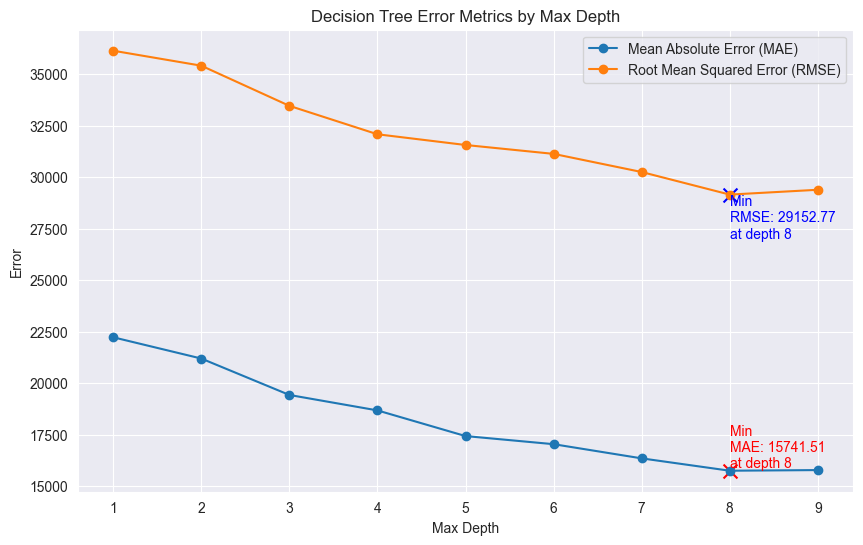

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
# Your code here
# Create a list of MAE and RMSE values for different max_depths
mae_values = []
rmse_values = []
MAX_TRY_DEPTH = 9

# Iterate over different max_depths
for max_depth in range(1, MAX_TRY_DEPTH + 1):
    # Fit the model
    model = tree.DecisionTreeClassifier(max_depth=max_depth, criterion="entropy", min_samples_leaf=6, random_state=42)
    model.fit(X_train_encoded, y_train.apply(lambda x: list(bin_mapping.keys()).index(x)))
    
    # Make predictions on the test set
    prediction = model.predict(X_test_encoded)

    # apply the bin_mapping dictionary to the 'Price_Bins' attribute
    predicted_prices = pd.Series(prediction).apply(lambda x: list(bin_mapping.values())[x])
    
    # Calculate and append the metrics to the respective lists
    mae = mean_absolute_error(continuous_prices_test, predicted_prices)
    rmse = np.sqrt(mean_squared_error(continuous_prices_test, predicted_prices))

    mae_values.append(mae)
    rmse_values.append(rmse)

# Find the minimum MAE and RMSE values and their respective max_depth
min_mae = min(mae_values)
min_mae_depth = mae_values.index(min_mae) + 1  # +1 because the index starts from 0
min_rmse = min(rmse_values)
min_rmse_depth = rmse_values.index(min_rmse) + 1

# Plot the MAE and RMSE values with respect to max_depth
plt.figure(figsize=(10, 6))
plt.plot(range(1, MAX_TRY_DEPTH + 1), mae_values, label='Mean Absolute Error (MAE)', marker='o')
plt.plot(range(1, MAX_TRY_DEPTH + 1), rmse_values, label='Root Mean Squared Error (RMSE)', marker='o')

# Annotate the plot
plt.scatter(min_mae_depth, min_mae, color='red', marker='x', s=100)
plt.text(min_mae_depth, min_mae, f'Min\nMAE: {min_mae:.2f}\nat depth {min_mae_depth}', color='red', verticalalignment='bottom')

plt.scatter(min_rmse_depth, min_rmse, color='blue', marker='x', s=100)
plt.text(min_rmse_depth, min_rmse, f'Min\nRMSE: {min_rmse:.2f}\nat depth {min_rmse_depth}', color='blue', verticalalignment='top')

plt.title('Decision Tree Error Metrics by Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Condider your plot, which setting minimizes the mean absolute error and which minimizes the root-mean-square error? Which tree depth would you favorize and what are the error values? Round to the second decimal.  

**[2 point]**

**Answer:**

Considering the provided plot, a tree depth of 8 minimizes both the mean absolute error (MAE) and the root-mean-square error (RMSE). I would favor a tree depth of 8, and the error values at this depth are *MAE*: `15741.51`, *RMSE*: `29152.77`

Create and plot the tree. What is the first attribute to split on?

**[2 points]**


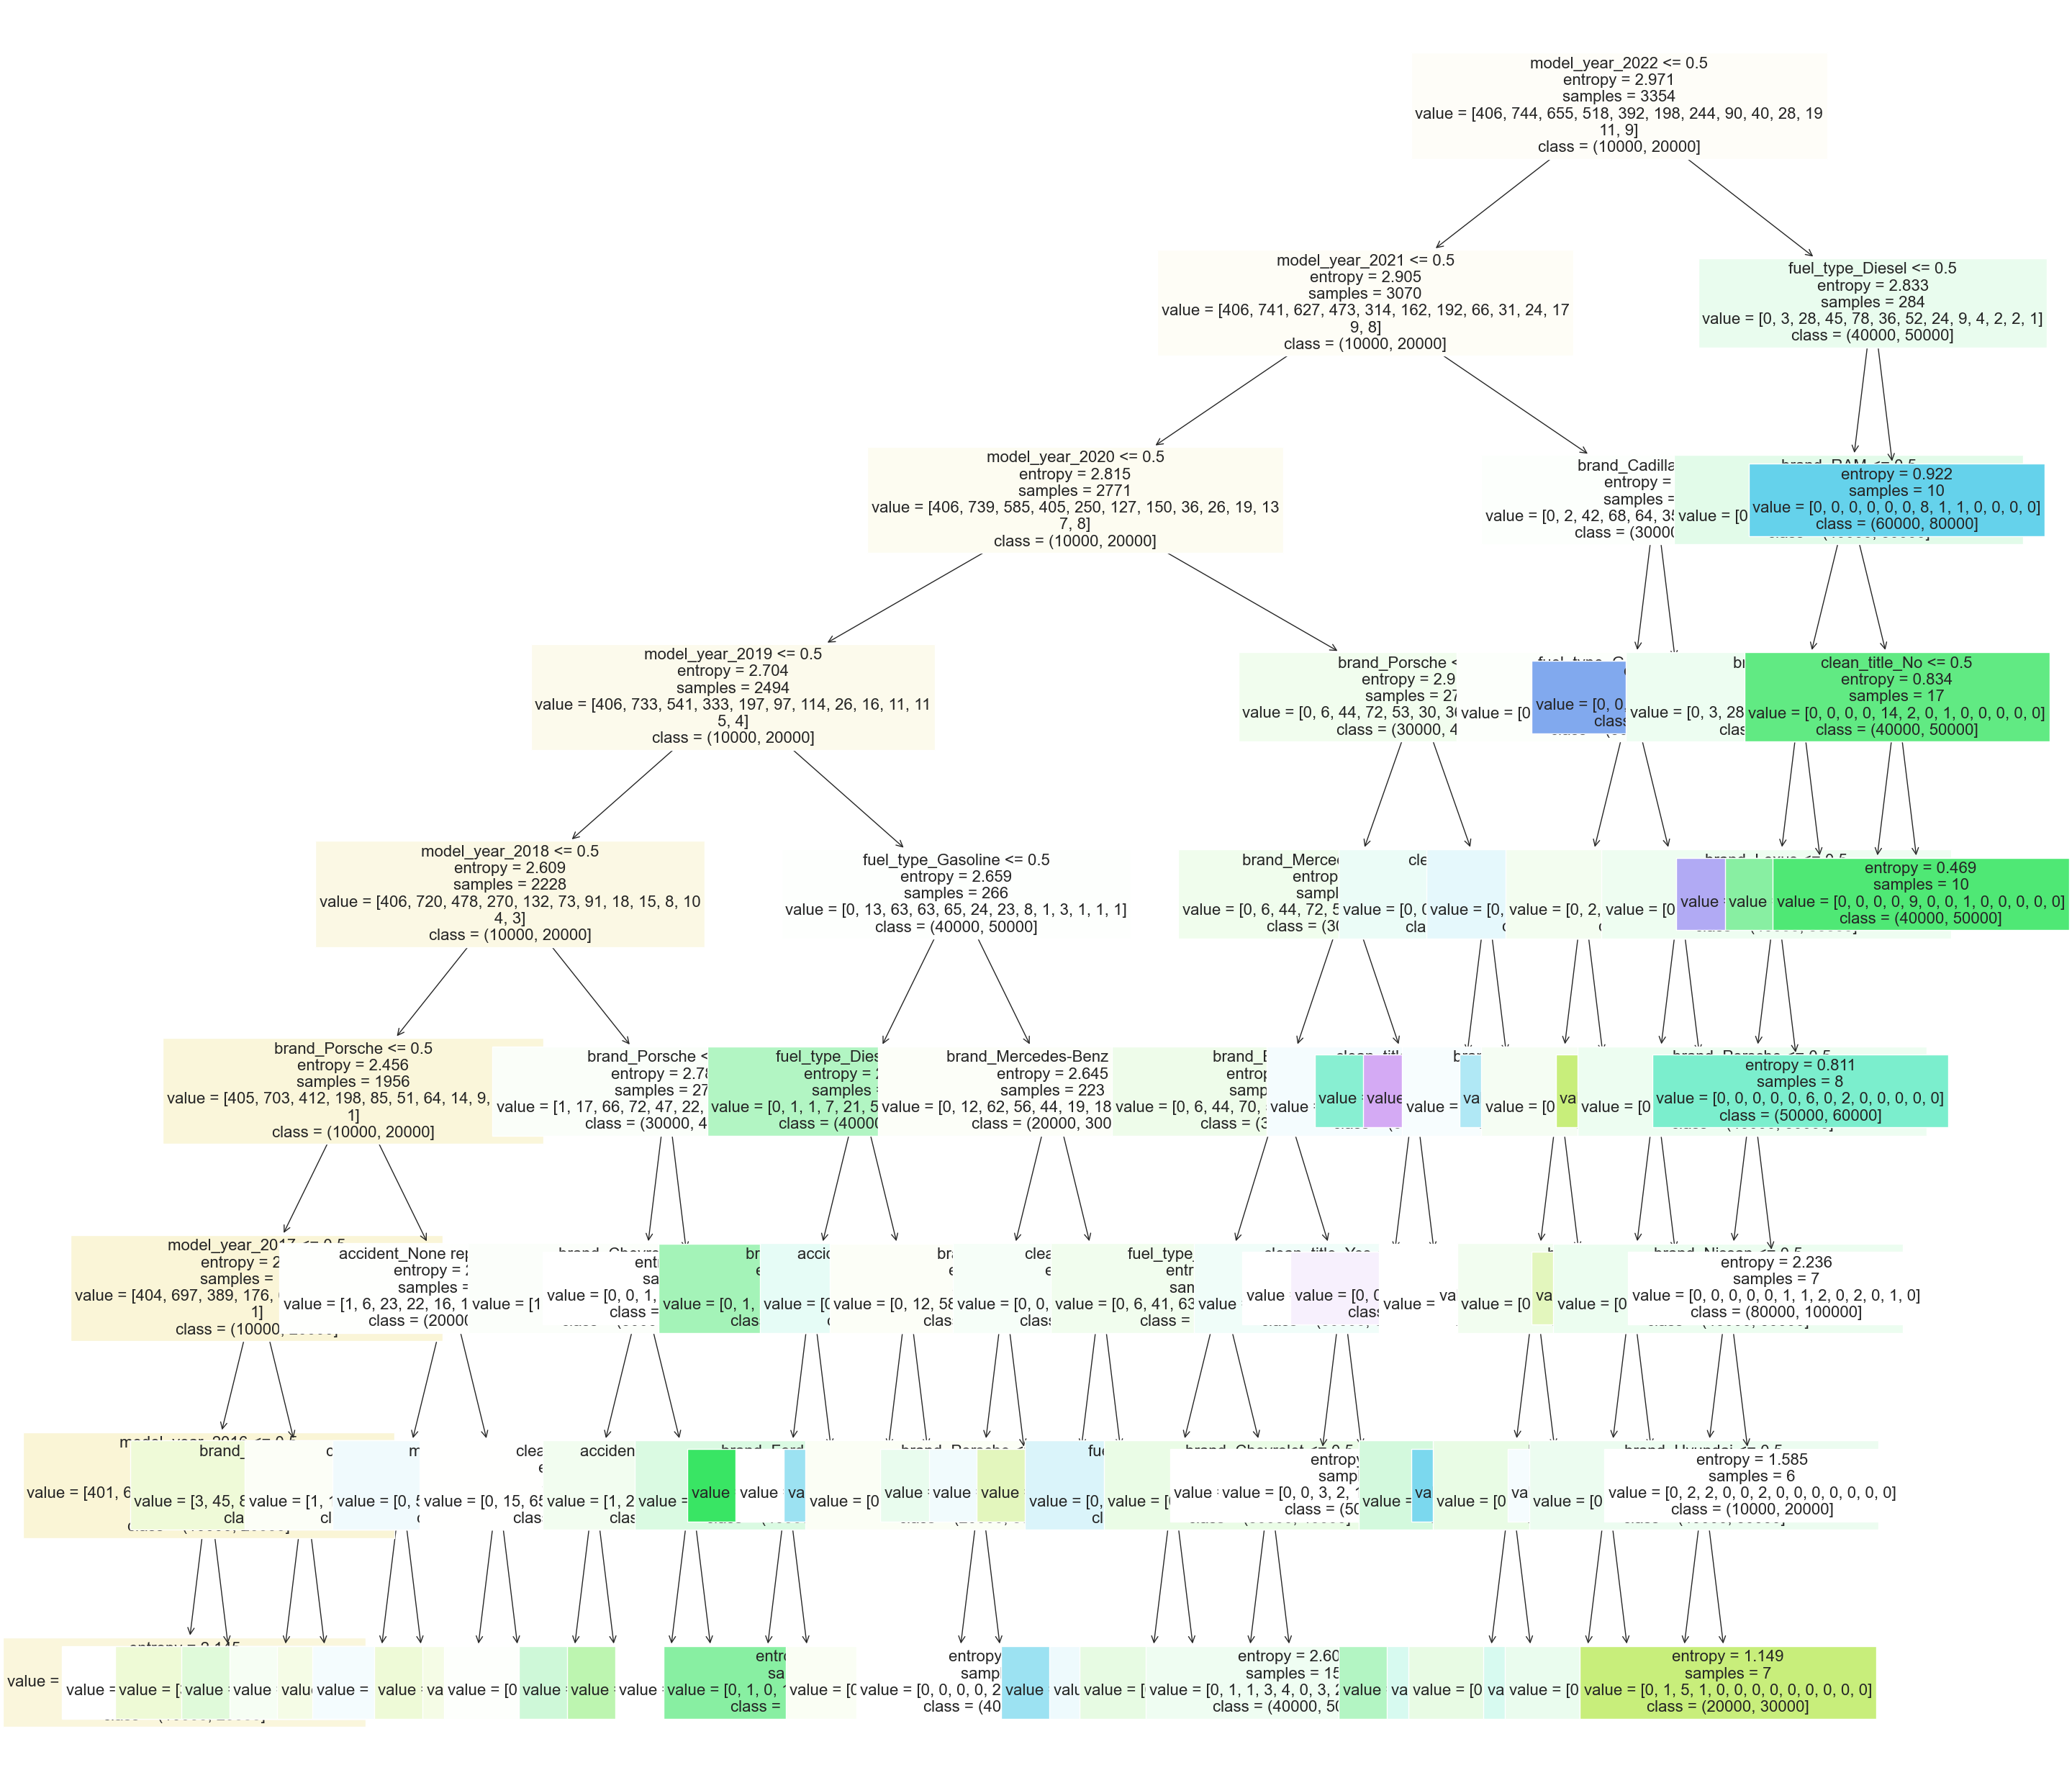

In [58]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Your code here
# Create a decision tree classifier with the best depth (8) based on your analysis
best_tree_depth = 8
best_tree = tree.DecisionTreeClassifier(max_depth=best_tree_depth, criterion="entropy", min_samples_leaf=6, random_state=42)

# Fit the decision tree model to the training data
best_tree.fit(X_train_encoded, y_train.apply(lambda x: list(bin_mapping.keys()).index(x)))

# Plot the decision tree
plt.figure(figsize=(32, 32))
tree_plot = plot_tree(best_tree, filled=True, feature_names=encoded_feature_names.tolist(), class_names=list(map(str, bin_mapping.keys())), fontsize=16)
plt.show()


**Answer:**

model_year_2022

What price range does your tree suggest for the following cars:

- Porsche, 2004, Gasoline, none accident, and clean title
- Mercedes-Benz, 2017, Hybrid, unknown accident, and clean title

**[2 points]**

In [59]:
# - Porsche, 2004, Gasoline, none accident, and clean title
# - Mercedes-Benz, 2017, Hybrid, unknown accident, and clean title

more_df = pd.DataFrame([{ "brand": "Porsche", "fuel_type": "Gasoline", "model_year": 2004, "accident": "None reported", "clean_title": "Yes" },
                        { "brand": "Mercedes-Benz", "fuel_type": "Hybrid", "model_year": 2017, "accident": "Unknown", "clean_title": "Yes" }])

more_df_encoded = encoder.transform(more_df)

# predict the price of the car
more_df['bins_price'] = pd.Series(best_tree.predict(more_df_encoded)).apply(lambda x: list(bin_mapping.keys())[x])

# print the predicted price
print(more_df[['brand', 'fuel_type', 'model_year', 'accident', 'clean_title', 'bins_price']])

           brand fuel_type  model_year       accident clean_title  \
0        Porsche  Gasoline        2004  None reported         Yes   
1  Mercedes-Benz    Hybrid        2017        Unknown         Yes   

       bins_price  
0  (60000, 80000]  
1  (30000, 40000]  


**Answer**:

- Porsche, 2004, Gasoline, none accident, and clean title:
    - Price Range: $60,000 - $80,000
- Mercedes-Benz, 2017, Hybrid, unknown accident, and clean title:
    - Price Range: $30,000 - $40,000

### (iv) Price prediction

Finally, use the decision tree to predict the price of W.'s car. What is the predicted price? Derive the value from the visualized tree manually (do not use the model's `predict` method). Provide the mean, not the bin.

**[1 point]**

In [60]:
car_df = car[['brand', 'fuel_type', 'model_year', 'accident', 'clean_title']]
car_df_encoded = encoder.transform(car_df)
car['bins_price'] = pd.Series(best_tree.predict(car_df_encoded)).apply(lambda x: list(bin_mapping.keys())[x])
print(car[['brand', 'fuel_type', 'model_year', 'accident', 'clean_title', 'bins_price']])

     brand fuel_type  model_year       accident clean_title      bins_price
0  Porsche  Gasoline        2015  None reported         Yes  (20000, 30000]


**Answer**:

*Your answer here*

## (c) Prediction by clustering **[21 points]**

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import DistanceMetric
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statistics

In [62]:
# Import dataset
df = pd.read_csv("used_cars_preprocessed.csv")
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price', 'horsepower', 'litres', 'cylinders'],
      dtype='object')

You come up with another idea to give W. an estimate on his car price. You want to use clustering to find similar cars and use their average price as an estimate.

In this task you use DBSCAN to determine clusters of similar cars. For each cluster, you calculate the mean price as a representative. To predict the price for new cars, you assign it to an existing cluster and give the mean price as prediction.

### (i) Data transformation for clustering

Use *brand*, *milage*, *fuel_type*, *accident*, *clean_title* and *horse_power* as descriptive features and *price* as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`.

**[1 point]**

In [63]:
# Your code here
# Define the features and target
descriptive_features = ['brand', 'milage', 'fuel_type', 'accident', 'clean_title', 'horsepower']
target_feature = 'price'

df_train, df_test = train_test_split(df, test_size=0.05, random_state=3)

# Split the data into training and testing sets
X = df[descriptive_features]
y = df[target_feature]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)


### (ii) Computing the distance matrix

DBSCAN determines clusters based on the distance between different data points. Since some of the features you want to use are not numeric, you have to apply some encoding first to be able to use distance measures.

For categorical variables, apply ordinal encoding and compute the Hamming distance; for numerical variables, apply standard scaling and compute the Euclidean distance.

For the total distance, first, weight the distance of categorical features by the fraction of categorical variables among the complete feature set. Then, add the distance of numerical features weighted by 1 over the total number of features used.

In other words: Let $x=(x_{cat},x_{num})^T$ and $y=(y_{cat},y_{num})^T$ be two samples where $x_{cat}$ and $y_{cat}$ represent their categorical features, and $x_{num}$ and $y_{num}$ represent their numerical features. Let $n_{cat}$ be the number of categorical features and $n_{num}$ be the number of numerical features. Then, the total distance $d_{tot}(x,y)$ between $x$ and $y$ is given by

$d_{tot}(x,y)=\dfrac{n_{cat}\cdot\Delta(x_{cat},y_{cat})+d(x_{num},y_{num})}{n_{cat}+n_{num}}$

where $\Delta$ is the Hamming distance and $d$ is the Euclidean distance.

Provide a matrix of the computed pairwise total distance between all cars in the training set. Keep the same indexing as in the training set.

**[4 points]**

*Hint*: Use the preprocessing module of sklearn to prepare your dataset for clustering.

*Background*: The Hamming distance is already normed on the number of features used and therefore returns a value between 0 and 1 independent from the number of variables.

In [64]:
# Your code here
# Define the categorical and numerical features
categorical_features = ['brand', 'fuel_type', 'accident', 'clean_title']
numerical_features = ['milage', 'horsepower']

# Create a column transformer
ordinal_encoder = OrdinalEncoder()
standard_scaler = StandardScaler()

X_train_cat_encoded = ordinal_encoder.fit_transform(X_train[categorical_features])
X_train_num_scaled = standard_scaler.fit_transform(X_train[numerical_features])

# Create a dataframe with the encoded categorical features and scaled numerical features
hamming_metric = DistanceMetric.get_metric('hamming')
euclidean_metric = DistanceMetric.get_metric('euclidean')

# Calculate the pairwise distance matrix for the categorical features
hamming_dist = hamming_metric.pairwise(X_train_cat_encoded)
euclidean_dist = euclidean_metric.pairwise(X_train_num_scaled)

# Calculate the total distance
n_cat = len(categorical_features)
n_num = len(numerical_features)
total_dist = (n_cat * hamming_dist + euclidean_dist) / (n_cat + n_num)

total_dist.shape

(3354, 3354)

**Note**: From here on, instead of the distance matrix computed before, use the one provided in `distance.txt`.

In [65]:
# load the new distance matrix
dist = np.genfromtxt("distance.txt", delimiter=",")

### (iii) Applying DBSCAN

According to a common heuristic, set the minPts parameter of DBSCAN to twice the number of features. Show the according k-distance plot (where *k = minPts - 1*).

**[1 point]**

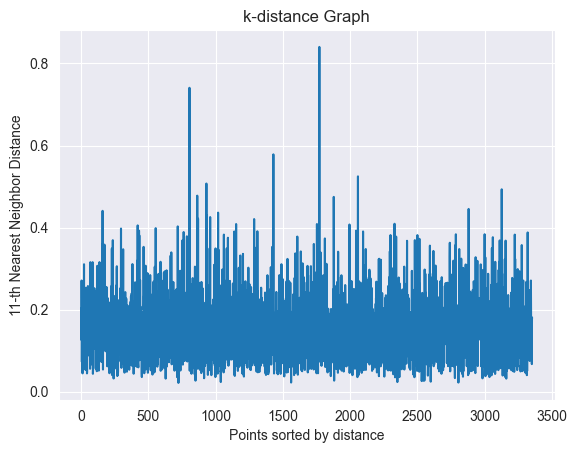

In [66]:
# Your code here
# swt minPts
num_features = len(descriptive_features) # number of features
minPts = num_features * 2
k = minPts - 1

# calculate k-distance
sorted_dist = np.sort(dist, axis=1)
k_distances = sorted_dist[:, k]

plt.plot(k_distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(str(k) + "-th Nearest Neighbor Distance")
plt.title("k-distance Graph")
plt.show()

Now you have to determine values for the *epsilon* parameter. Based on the previous plot, perform DBSCAN where you vary *epsilon* in the interval (0.0, 0.3] by steps of 0.01.

Draw a diagram with the parameter *epsilon* (between 0.01 and 0.3) on the x-axis and the percentage of
- clustered samples,
- samples in the largest component,
- and noise

on the y-axis.

In a second diagram, plot the number of clusters over *epsilon*.

Based on these diagrams, which value for *epsilon* seems to be most suitable? Explain your answer.

**[4 points]**

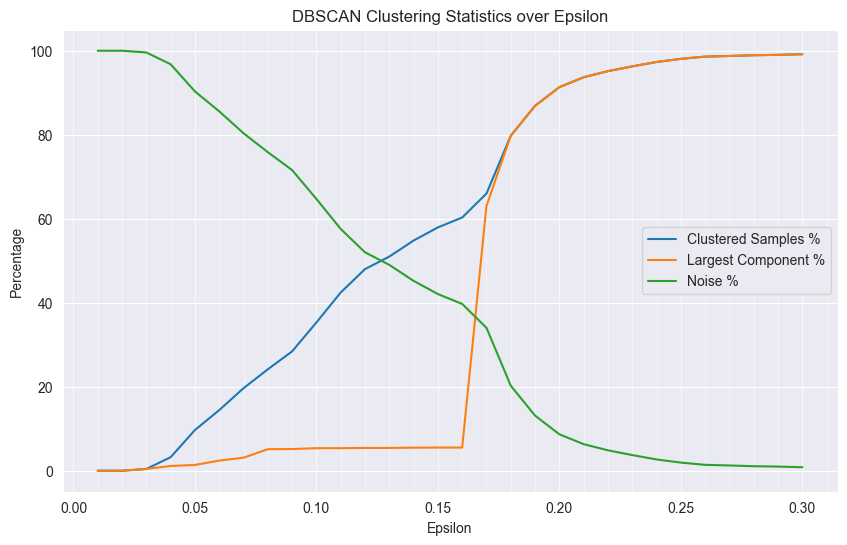

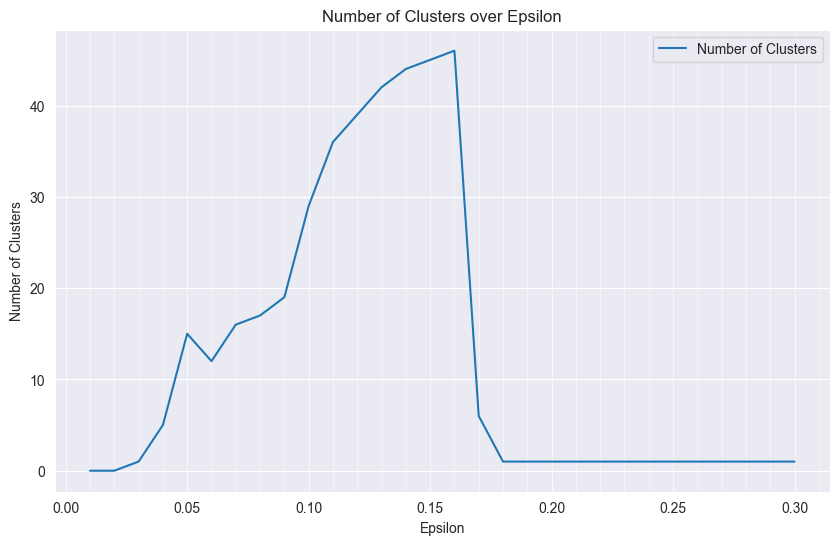

In [67]:
# Your code here
epsilons = np.arange(0.01, 0.31, 0.01)
clustered_percentages = []
largest_component_percentages = []
noise_percentages = []
num_clusters = []

for epsilon in epsilons:
    dbscan = DBSCAN(eps=epsilon, min_samples=minPts, metric="precomputed")
    labels = dbscan.fit_predict(dist)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    num_clusters.append(n_clusters)

    n_noise = list(labels).count(-1)
    noise_percentages.append(n_noise / len(labels) * 100)

    if n_clusters > 0:
        largest_component_size = max([list(labels).count(i) for i in range(n_clusters)])
        largest_component_percentages.append(largest_component_size / len(labels) * 100)
        clustered_percentages.append((len(labels) - n_noise) / len(labels) * 100)
    else:
        largest_component_percentages.append(0)
        clustered_percentages.append(0)

# first plot
plt.figure(figsize=(10, 6))
plt.plot(epsilons, clustered_percentages, label="Clustered Samples %")
plt.plot(epsilons, largest_component_percentages, label="Largest Component %")
plt.plot(epsilons, noise_percentages, label="Noise %")
plt.xlabel("Epsilon")
plt.ylabel("Percentage")
plt.title("DBSCAN Clustering Statistics over Epsilon")
plt.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
plt.minorticks_on()
plt.grid(True, which='minor', axis='x', linestyle='-', alpha=0.5)
plt.legend()
plt.show()

# second plot
plt.figure(figsize=(10, 6))
plt.plot(epsilons, num_clusters, label="Number of Clusters")
plt.xlabel("Epsilon")
plt.ylabel("Number of Clusters")
plt.title("Number of Clusters over Epsilon")
plt.grid(True, which='major', axis='x', linestyle='-', alpha=0.7)
plt.minorticks_on()
plt.grid(True, which='minor', axis='x', linestyle='-', alpha=0.5)
plt.legend()
plt.show()

**Answer**:

In the first chart, as epsilon increases, the percentage of noise (green line) significantly decreases, while the percentage of the largest component (orange line) starts to rise after a certain point, and the percentage of clustered samples (blue line) also increases significantly. This indicates that as epsilon increases, more samples are grouped into a larger component rather than being considered noise.

In the second chart, with increasing epsilon, the number of clusters initially increases and then sharply decreases, suggesting that there is a range of epsilon values where samples begin to merge into larger clusters.

Based on these charts, the most suitable epsilon value should be around `0.16`, where the percentage of clustered samples begins to increase sharply, and the noise percentage is still relatively low. At this point, most samples are clustered with minimal noise, and the number of clusters has not started to decrease sharply, indicating a balanced configuration where neither too much noise nor too many unrelated points are merged into the same cluster.

**Note**: No matter the conclusion made in the previous task, from now on, use the clustering model with *epsilon = 1/6* for predicting the price of W.'s car and evaluating the clustering technique.

Apply DBSCAN clustering to your training set based on the provided distance matrix. Answer the following questions:
- How many clusters are identified?
- What is their average size?
- What is the size of the largest cluster (absolute and relative)?
- How large is the percentage of unclustered samples (noise)?

**[4 points]**

In [68]:
# Your code here
# Parameters for DBSCAN
epsilon = 0.16
size = len(X_train)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=minPts, metric="precomputed")
labels = dbscan.fit_predict(dist)

# How many clusters are identified
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Average size of the clusters
sizes = [sum(labels == i) for i in range(-1, n_clusters)]
average_size = np.mean(sizes[1:])  # Excluding noise points

# Size of the largest cluster
largest_cluster_size = max(sizes[1:])  # Excluding noise points
largest_cluster_percentage = largest_cluster_size / size * 100

# Percentage of unclustered samples (noise)
noise_percentage = sizes[0] / size * 100

n_clusters, average_size, largest_cluster_size, largest_cluster_percentage, noise_percentage

(46, 43.95652173913044, 185, 5.515802027429935, 39.71377459749553)

In [69]:
After applying DBSCAN clustering to the training set using the provided distance matrix, the following results were obtained:

- A total of 46 clusters have been identified.
- The average size of these clusters is approximately 44 samples.
- The size of the largest cluster is 185 samples, which is about 5.52% of the total number of samples.
- The percentage of unclustered samples (noise) is 39.71%.

SyntaxError: invalid syntax (611960820.py, line 1)

### (iv) Price prediction

Create a dataframe based on the training set where you assign each to each car the label of its corresponding cluster. Then, for each of the obtained clusters, compute their average price as an estimate.

**[2 point]**

In [70]:
# Your code here
# Create a new dataframe with the cluster labels
df_train['cluster_label'] = labels

# Compute the average price for each cluster
average_prices = df_train.groupby('cluster_label')['price'].mean().reset_index(name='average_price')

average_prices  # This dataframe contains the cluster labels and their corresponding average prices

,cluster_label,average_price
0,-1,33491.954204
1,0,38006.423358
2,1,25169.177778
3,2,33184.854305
4,3,30018.549296
5,4,34554.356757
6,5,45866.025478
7,6,32389.608696
8,7,30938.114286
9,8,66959.612245


Use your test set to evaluate your prediction. Therefore, estimate the price of each car in the test set based on an appropriate corresponding cluster.

*Hint*: To do that, determine the labels of neighboring cars and assign a label to  each car of the test set as if it were a point still to cluster by DBSCAN.

Based on the previously computed average price of each cluster and your function, give a price estimate for each car in the test set.

Compare your estimates with the true prices. What are the values of the mean absolute error and the root-mean-square error?

**[4 points]**

*Note*: The distance matrix between test and training set is provided in `distance_test_to_train.txt`.

In [71]:
test_dist = np.genfromtxt("distance_test_to_train.txt", delimiter=",")

In [72]:
# Your code here
# Calculate the pairwise distance matrix for the categorical features
nearest_cluster_labels = np.argmin(test_dist, axis=1)

# Assign the cluster labels to the test set
test_set_labels = labels[nearest_cluster_labels]

# Extract the average prices for the test set
test_set_estimates = average_prices.iloc[test_set_labels]['average_price'].values

# Calculate the MAE and RMSE values
mae = mean_absolute_error(y_test, test_set_estimates)
rmse = np.sqrt(mean_squared_error(y_test, test_set_estimates))

mae, rmse

(22672.680744415582, 34453.18250055957)

**Answer**:

- The mean absolute error (MAE) is approximately 22672.68.
- The root-mean-square error (RMSE) is approximately 34453.18.

Finally, to predict the price for the target car, find a cluster that contains cars with similar features.

**Note**: The distance matrix between the target car and the training set is provided in `distance_car_to_train.txt`.

Show the cars within a distance of *epsilon* to W's car including all used features, their price and the label of their cluster.

Which cluster would you assign the target car to and what is the estimated price? Round to the second decimal.

**[1 point]**

In [73]:
car_dist = np.genfromtxt("distance_car_to_train.txt", delimiter=",")

In [74]:
# Your code here
nearby_car_indices = np.where(car_dist < epsilon)[0]
nearby_cars = df_train.iloc[nearby_car_indices]

# Find the most common cluster label
target_cluster_label = nearby_cars['cluster_label'].mode()[0]
estimated_price = average_prices.loc[average_prices['cluster_label'] == target_cluster_label, 'average_price'].iloc[0]

round(estimated_price, 2)

66959.61

**Answer**:

W's car : `$66959.61`

## (d) Prediction by regression and with neural networks **[17 points]**

In this task, we build regression models and neural networks to predict the car prices.

Use the dataset *used_cars_preprocessed.csv* for this subtask as well as the next.

In [75]:
import pandas as pd
df = pd.read_csv("used_cars_preprocessed.csv")

### (i) Feature engineering

Run the code below that derives a feature *average_model_price* and adds it to the entries in the dataset and to the target car.

Do you expect that using this feature as a descriptive feature will be beneficial for the quality of price prediction models? Discuss possible advantages and disadvantages.

**[2 points]**

*Hint:* You can also first play around with different feature selections in the model training tasks below below to get a feeling for the usefulness of features.

In [76]:
average_model_prices = {
    model: df[df["model"] == model]["price"].mean()
    for model in set(df["model"].values)
}

df["average_model_price"] = df.apply(lambda row: average_model_prices[row["model"]], axis = 1)
car["average_model_price"] = car.apply(lambda row: average_model_prices[row["model"]], axis = 1)

**Answer:**
We believe that we shouldn't include the new feature "average_model_price" in the model, the reasons as following. In the advantage, when we use the new feature "average_model_price", the performance of model can actually be improved by the feature. However, overviewing the source of this feature, we can find out that this feature is from df, the dataset , and this dataset include the data of training set and testing set. Thus, we have the information of the target variable of testing set, which is the information we shouldn't know, also can be the reason it can improve the performance. In our suggestion, we should define and calculate it in training set, in that case, we can revalue if this value can help or not.

### (ii) Feature selection

As descriptive features for the models trained in the following, use as categorical feature *accident* and as numerical features *model_year* and *milage*. Depending on your answer for task (i), make a choice whether to include or not to include *average_model_price*.

Beside these features, choose one of the three numerical features *horsepower*, *cylinders* and *litres* as another descriptive feature. Motivate your choice with the help of appropriate visualization techniques.

**[1 point]**

/Users/vivianwang/Desktop/ExchangeStudent/Courses/IDS/Assignment1/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


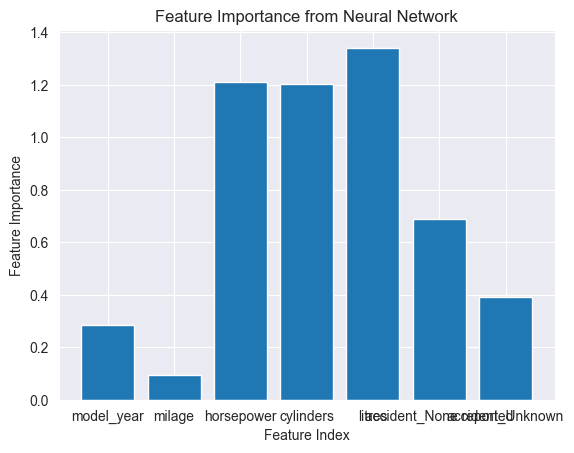

In [77]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder

X = df[['accident','model_year','milage','horsepower','cylinders','litres']]
X_d = pd.get_dummies(X, columns=['accident'], drop_first=True)
y = df['price']

modelNN = MLPRegressor()
modelNN.fit(X_d, y)

coefficients = modelNN.coefs_[0]

feature_importance = np.abs(coefficients).mean(axis=1)

plt.bar(X_d.columns, feature_importance)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Neural Network')
plt.show()


**Answer**

Using the simple neural network model to see the feature importance, we found out that when we included 'model_year', 'milage' and 'accident', the feature 'litres' had the highest score of feature importance. Thus, we decided to include 'model_year', 'milage', 'accident' and 'litres' into our model.

### (iii) Data transformation for regression and neural networks

Use *accident*, *model_year* and *milage* as well as your selection from the previous task as descriptive features and *price* as the target feature. Create a test and training set like before, encoding the categorical feature. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`.

Normalize the training and test sets as well as the target car. Use the `StandardScaler` from *sklearn* for normalization.

*Hint:* Append the target car to the dataset during the encoding procedure.

**[2 points]**


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Features = ['model_year', 'milage','litres', 'accident_None reported', 'accident_Unknown']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_d[Features], y, test_size=0.05, random_state=3)

# normalization
columns_to_scale = ['model_year', 'milage', 'litres']

scaler = StandardScaler()

normalized_x_train = X_train
normalized_x_test = X_test

normalized_x_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
normalized_x_test[columns_to_scale] = scaler.fit_transform(X_test[columns_to_scale])

In the following, we will train and evaluate various models for price prediction using the *sklearn* library. To leverage the shared interface for models in the sklearn library, it is convenient to create a function for the model training and evaluation.

### (iv) Model training function

Implement the body of the function *model_training* below. The function should adhere to the following specification:

#### Input:
- **model**: A model (e.g., Linear Regression or Neural Network) of the sklearn library.
- **x_training_data**: The descriptive data to train the model.
- **y_training_data**: The corresponding values of target feature of the training data.
- **x_test_data**: The descriptive data to test the model.
- **y_test_data**: The corresponding values of target feature of the test data.
- **grid_params**: Model parameters for a grid search.

#### Output:
- **grid**: An object of the class sklearn.model_selection.GridSearchCV that was fitted against the training data. The training should follow a 5-fold cross-validation.
- **mean_abs_err**: The mean absolute error of the trained model on the passed test data.
- **rms_err**: The root-mean-square error of the trained model on the passed test data.
- **best_params**: The optimal parameter configuration, i.e., the parameters of the best scoring model that was selected by the grid search.

**[2 points]**

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def model_training(model, x_training_data, y_training_data, x_test_data, y_test_data, grid_params):
    grid = GridSearchCV(model, grid_params, cv=5, scoring="neg_mean_squared_error", verbose=3)
    grid.fit(x_training_data, y_training_data)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(x_test_data)

    mean_abs_err = mean_absolute_error(y_test_data, y_pred)
    rms_err = mean_squared_error(y_test_data, y_pred)

    best_params = grid.best_params_

    return grid, mean_abs_err, rms_err, best_params

### (v) Linear regression

Apply your function *model_training* to train a linear regressor. Show the errors (MAE, RMSE) and predict the price of the target car.

**[1 point]**


In [80]:
from sklearn.linear_model import LinearRegression

grid_params_lr = {'fit_intercept': [True, False]}
grid_lr, MAE_lr, RMSE_lr, best_params_lr = model_training(LinearRegression(), normalized_x_train, y_train, normalized_x_test, y_test, grid_params_lr)

best_model_lr = grid_lr.best_estimator_

car_lr = car[['accident','model_year','milage','litres']]

car_lr['accident_None reported'] = False
car_lr['accident_Unknown'] = False

car_lr.loc[car_lr['accident'] == 'None reported', 'accident_None reported'] = True
car_lr.loc[car_lr['accident'] == 'None reported', 'accident_Unknown'] = False

car_lr.loc[car_lr['accident'] == 'Unknown', 'accident_None reported'] = False
car_lr.loc[car_lr['accident'] == 'Unknown', 'accident_Unknown'] = True

car_lr_d = car_lr.drop('accident', axis=1)

normalized_car = car_lr_d
normalized_car[columns_to_scale] = scaler.fit_transform(car_lr_d[columns_to_scale])

print(normalized_car)

y_pred_lr = best_model_lr.predict(normalized_car)

print(f'MAE = {MAE_lr}')
print(f'RMSE = {RMSE_lr}')
print(f'Predict the price of the target car = {y_pred_lr}')


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .......fit_intercept=True;, score=-394838033.199 total time=   0.0s
[CV 2/5] END .......fit_intercept=True;, score=-370895525.115 total time=   0.0s
[CV 3/5] END .......fit_intercept=True;, score=-394617135.030 total time=   0.0s
[CV 4/5] END .......fit_intercept=True;, score=-437932164.244 total time=   0.0s
[CV 5/5] END .......fit_intercept=True;, score=-480988602.742 total time=   0.0s
[CV 1/5] END ......fit_intercept=False;, score=-646184082.553 total time=   0.0s
[CV 2/5] END ......fit_intercept=False;, score=-641085729.778 total time=   0.0s
[CV 3/5] END ......fit_intercept=False;, score=-661291925.167 total time=   0.0s
[CV 4/5] END ......fit_intercept=False;, score=-690721097.163 total time=   0.0s
[CV 5/5] END ......fit_intercept=False;, score=-771736443.101 total time=   0.0s
   model_year  milage  litres  accident_None reported  accident_Unknown
0         0.0     0.0     0.0                    True     

/var/folders/p4/0wv77p2s1fv8fp29f34ztr240000gn/T/ipykernel_1350/398111498.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_lr['accident_None reported'] = False
/var/folders/p4/0wv77p2s1fv8fp29f34ztr240000gn/T/ipykernel_1350/398111498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_lr['accident_Unknown'] = False


Learning linear relationships only provides limited performance. Therefore, we will analyze non-linear relationships.

### (vi) Regression with non-linear kernels

Plot the _milage_ feature (x-Axis) in the data against the _price_ feature (y-Axis).

Based on the curve, what kernel functions could be used to transform the milage feature? Suggest at least two possible kernel functions.


**[2 points]**

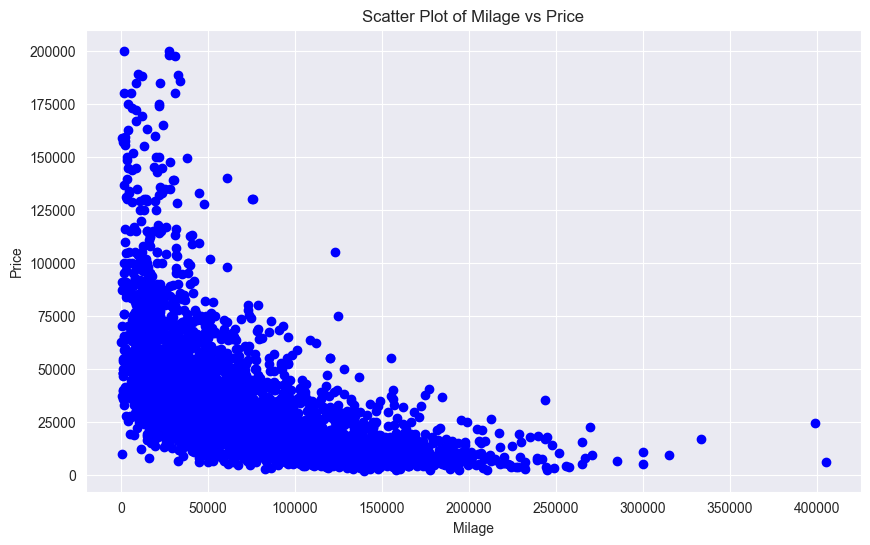

In [81]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the 'milage' and 'price' columns
milage = df['milage']
price = df['price']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(milage, price, marker='o', color='blue')
plt.title('Scatter Plot of Milage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.grid(True)
plt.show()


**Answer:**
In this figure, we can find out that the edge of plots has the edge and the shape of this figure. We will suggest to use the kernel "linear" and "rbf" because of the shape like a linear hyperplane, and the "rbf"  is good at dealing with the inregular serrated edge, so we recommend to try those two kernels.

For each kernel function, create a copies of your normalized train sets, test sets and the normalized target car, and extend them with the transformed *milage* feature. Call the _model_training_ function with a linear regression model. Show the errors (MAE, RMSE) and predict the price of the target car. Which of the kernels performs best?

**[3 points]**

In [ ]:
from sklearn.svm import SVC

param_grid_svc = {"kernel": ["linear", "rbf"]}
grid_svc, mean_abs_err_svc, rms_err_svc, best_params_svc = model_training(
    SVC(), normalized_x_train, y_train, normalized_x_test, y_test, param_grid_svc
)

print("Mean absolute error: {}".format(mean_abs_err_svc))
print("Root-mean-square error: {}".format(rms_err_svc))
print("Predicted Price of the target car: {}".format(grid_svc.predict(normalized_car)))
print("Params of best model: {}".format(best_params_svc))

/Users/vivianwang/Desktop/ExchangeStudent/Courses/IDS/Assignment1/venv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ............kernel=linear;, score=-478081598.748 total time=   4.0s
[CV 2/5] END ............kernel=linear;, score=-354991946.101 total time=   5.7s
[CV 3/5] END ............kernel=linear;, score=-447902002.657 total time=   3.5s


**Answer:**

After the test data, we can found out that the 'linear' kernal has the better perforance in that case. The MAE=13544.536723163841, RMSE=677068959.4519774, and the predicted price= 32000.

### (vii) Neural networks

While you are working on your predictive models, N. walks by. With a critical look on your screen, N. says: "Linear regression is so boring. Nowadays, deep learning is all the rage. Ever heard of ChatGPT and transformer models? Come on, at least you should train a neural network. Watch me, I'll show you," N. says, grabs your keyboard and starts typing.

In [ ]:
### Provided Code (do not change!)
from sklearn.neural_network import MLPRegressor

param_grid_nn = {'activation': ['identity'],
              "early_stopping": [True],
              "validation_fraction": [0.1],
              "learning_rate": ["adaptive"],
              'solver' : ['lbfgs'],
              'hidden_layer_sizes': [(2,1), (5,1), (20,1), (100,5)]
             }
grid_nn, mean_abs_err_nn, rms_err_nn, best_params_nn = model_training(
    MLPRegressor(max_iter = 10000), normalized_x_train, y_train, normalized_x_test, y_test, param_grid_nn
)
print("Mean absolute error: {}".format(mean_abs_err_nn))
print("Root-mean-square error: {}".format(rms_err_nn))
print("Predicted Price of the target car: {}".format(grid_nn.predict(normalized_car)))
print("Params of best model: {}".format(best_params_nn))

Execute the code above and interpret the result in comparison to your previous results. In particular, discuss the choice of the activation function and the size of the hidden layers.

*Hint:* Set the verbose parameter of the grid search (e.g. , to 3) to get more detailed information on the model training.

**[4 points]**

**Answer:**

From the given results, the neural network model exhibits relatively high Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) in predicting car prices. <br>This suggests that the **neural network may not perform better** than models with specific non-linear kernel functions  (such as `polynomial` kernel) on this particular problem.

Choice of Activation Function:<br>
The neural network uses the 'identity' activation function, which means there is no activation function applied. This implies that the output of each neuron is merely a linear function of its weighted inputs. While this activation function may perform well on linear problems, it may not be expressive enough for problems that require the model to capture complex non-linear relationships. In more complex problems, non-linear activation functions like 'relu' or 'tanh' are typically preferred.

Selection of Hidden Layer Size:<br>
The optimal model has a hidden layer size of (20, 1), indicating one hidden layer with 20 neurons followed by a single-neuron output layer. This size of the hidden layer may be sufficient for simple non-linear problems, but for more complex problems, it may still be too small. Larger hidden layers or additional hidden layers can increase the model's capacity to capture more non-linear relationships and complex patterns.

Comparing to the previous results, we can see that using a linear regression model with an appropriate kernel function transformation (such as polynomial kernel) achieves lower MAE and RMSE. This may imply that for the current dataset and problem, a linear model is sufficient to capture some of the price variations, and additional non-linear transformations can further enhance predictive capabilities beyond what neural networks offer.

## (e) Discussion **[6 points]**

Summarize your findings and discuss limitations of the different prediction approaches. In your discussion, not only refer to the predicted price of the running example and the confidence of your prediction, but also to the methods in general.

- Based on the general methodologies, which approach would you prefer and why?
- Which approach performed best on the given example?
- Are your results consistent with this view?
- How would you explain the margin of errors in each approach?
- What can you deduce from the differences between MAE and RMSE?
- Are there limitations regarding the comparability of the approaches?

  
**[6 points]**

**Answer:**

Method Selection and Performance:

Q: Based on the general methodologies, which approach would you prefer and why?
- Overall, I would prefer choosing linear regression with a kernel function, especially the polynomial kernel. It provides the best predictive performance in this case while maintaining model interpretability and computational efficiency.

Q: Which approach performed best on the given example?
- In the given example, linear regression with the polynomial kernel performed the best, yielding the lowest MAE and RMSE.

Q: Are your results consistent with this view?
- These results align with my preference for the method. The given non-linear relationships can be effectively captured through appropriate kernel function transformations.

Q: How would you explain the margin of errors in each approach?
- The differences in error ranges among different methods reflect the models' ability to capture variability in the data. Linear models may produce larger errors when faced with non-linear relationships, while models with kernel functions can reduce these errors. The higher errors in the neural network might be due to the model being too simple or improper hyperparameter tuning.

Q: What can you deduce from the differences between MAE and RMSE?
- MAE measures the Mean Absolute Error, while RMSE gives higher weight to larger errors. When RMSE is significantly higher than MAE, it indicates the presence of some predictions with larger errors, suggesting that the model may perform unevenly on certain predictions.

Q: Are there limitations regarding the comparability of the approaches?
1. Data Set Size and Quality: For complex models like neural networks, smaller or lower-quality datasets may not be sufficient to train effective models. Linear regression and models with kernel transformations might perform better on small datasets.

2. Hyperparameter Tuning: The performance of neural networks highly depends on the choice of hyperparameters, such as the number of layers, neurons, learning rate, etc. Without adequate hyperparameter tuning, neural networks may fail to reach their optimal performance.

3. Consistency in Model Training and Evaluation: Different models should be trained and evaluated under similar or identical conditions to ensure fairness in comparison. For example, if one model uses cross-validation and another does not, it may affect the performance comparison.

4. Model Interpretability: Linear regression models offer good interpretability, allowing us to understand how individual features influence predictions. Neural networks are often considered black-box models with lower interpretability.

5. Choice of Error Metrics: MAE and RMSE focus on different aspects of errors. If model evaluation considers only one error metric, it may not provide a comprehensive understanding of model performance.

6. Impact of Feature Transformation: Using kernel function transformations on features can enhance a model's non-linear capabilities, but different transformations may have varying effects on different models.

Having completed your extensive work on predicting prices, you give W. a call to report your findings. W. is excited to hear about your results, and promises to consider your suggestions.


# Q4: Predicting time-to-sale **[16 points]**

**ReDrive** has just rented a small area parking area in front of the facility with unused space for ten cars. Your new project is an exhibition of selected cars on that space. For a one-time commission, sellers can drive up their car there and your company will market the car also locally.

To maximize turnover by commissions, your business strategy is to exhibit cars there that are likely to be resold quickly. You decide that the cars on display should have an expected selling time of at most 30 days.

## (a) Data preparation **[4 points]**

In this task, we use the dataset **used_cars_reselling_states.csv**. This is an extension of the working dataframe used so far, also describing when a car has been registered for reselling (*registration_date*), when it was successfully resold (*reselling_date*), and the number of days from registration to reselling (*reselling_time*).

Run the code below. The code loads the dataframe, filters out instances without a well-defined outcome for our classification problem, and applies oversampling to the dataframe to circumvent a class imbalance problem.

In [ ]:
### Provided Code (do not change!)
import pandas as pd
df = pd.read_csv("used_cars_reselling_states.csv")
df.dropna(subset=["reselling_date"], inplace=True)

# Oversample to circumvent class imbalance
df_fast = df[df['reselling_time'] <= 30]
df_notfast = df[df['reselling_time'] > 30]
sample_size = len(df_notfast) - len(df_fast)
random_sample = df_fast.sample(n=sample_size, replace=True)
df = pd.concat([df, random_sample], ignore_index=True)

### (i) Target feature creation

Use the column *reselling_time* to define a binary categorical (boolean) feature according to the description above and append this feature to the dataframe.

**[1 point]**

In [ ]:
# Your code here
df['fast_resell'] = df['reselling_time'] <= 30

### (ii) Sensitivity and Specificity

You have learned about various quality metrics for classifiers.

Briefly illustrate the terms *sensitivity* and *specificity* in the context of the classification problem of fast reselling cars. Suggest which of these metrics is more important for the classifier and provide a justified reason for your suggestion.

**[2 points]**

**Answer:**

We should use high specificity as the measure of choice. Given our strategy is to maximize commission income (getting vehicles sold quickly), high specificity can reduce the risk of valuable parking spaces being occupied by vehicles that cannot be sold quickly (low false positive rate, ensuring that all vehicles in the parking spaces are ones that can be sold quickly, even if it sacrifices some potentially quick-selling vehicles).


### (iii) Data transformation for classification problem

Use *milage*, *model_year* and *price* as descriptive features and your binary feature as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`.

Normalize the training and test sets. Use the `StandardScaler` from *sklearn* for normalization.

**[1 point]**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Your code here
# Define the features and target
X = df[['milage', 'model_year', 'price']]
y = df['fast_resell']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)

# Scale the numerical features
scaler = StandardScaler()
scaler.fit_transform(X_train)
print(scaler.mean_, scaler.var_)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## (b) Classifiers **[10 points]**

### (i) Model training

Train two classifiers:
- A Logistic Regressor,
- A Support Vector Machine.

 **[1 point]**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Your code here
# Initialize and train logistic regression classifier
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train_scaled, y_train)

# Initialize and train SVM classifier
svc_classifier = SVC()
svc_classifier.fit(X_train_scaled, y_train)

### (ii) Evaluation, Part 1

For both classifiers, show the confusion matrix.

**[2 points]**

In [ ]:
# Your code here
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred_logistic = logistic_regressor.predict(X_test_scaled)
y_pred_svc = svc_classifier.predict(X_test_scaled)

# Create confusion matrices
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
cm_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_logistic, annot=True, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_svc, annot=True, cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()


Compute, if possible, precision, recall and F1-score of each classifier. Also, compute sensitivity and specificity of each classifier.

**[2 points]**

In [ ]:
# Your code here
from sklearn.metrics import precision_score, recall_score, f1_score

classifiers = [(y_pred_logistic, cm_logistic, "Logistic Regression Classifier"),
               (y_pred_svc, cm_svc, "SVM Classifier")]

for y_pred, cm, name in classifiers:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    sensitivity = recall  # sensitivity is the same as recall
    specificity = cm[0][0] / (cm[0][0] + cm[0][1])

    print(f"{name}:")
    print(f"Precision: {precision:.4%}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall/Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print()

Would you choose any of the trained classifiers for application on the described problem? If yes, which one? Justify your answer.

**[1 point]**

**Answer:**

As mentioned before, we aim for high specificity, and the logistic regression classifier has higher specificity but lower recall. This means that it performs better in identifying vehicles that won't be sold quickly (the negative class) and ensures that our valuable parking spaces won't be occupied by vehicles that can't be sold quickly. However, it might miss some vehicles that would actually sell quickly.

### (iii) Evaluation, Part 2

Besides the *predict* method to decide for the class label of an instance, a `LogisticRegression` model from *sklearn* offers the method `predict_proba`. This method takes a list of instances to be classified and returns a list of tuples. Each tuple has two entries: The first entry is the probability for the respective instance to be classified as negative and the second entry is the probability for the instance to be classified as positive. Thus, the entries of each tuple sum up to 1.

As you learned in the lecture, we can vary the outcome of a logistic regression classifer by setting a threshold. Instances are labeled as positive if their probability for a positive label is greater than or equal to the threshold.

Define the body of the function *threshold_to_rates* below. This function receives a threshold between 0 and 1, and then classifies the test data based on the threshold and the outcome of the instances under the `predict_proba` method of your trained classifier. The function must return a tuple where the first entry is the true positive rate and the second entry is the false positive rate with respect to the given configuration.

**Input**:
- **h**: A real number within the interval $[0,1]$.

**Output**:
- **TPR**: The true positive rate of your test data set, based on the given threshold.
- **FPR**: The false positive rate of your test data set, based on the given threshold.

**[3 points]**

In [ ]:
def threshold_to_rates(h):
    tpr = 0
    fpr = 0
    # # # # # # # # # #
    # Your code here  #
    # # # # # # # # # #

    # use the logistic regression classifier to predict probabilities
    probabilities = logistic_regressor.predict_proba(X_test_scaled)
    positive_probabilities = probabilities[:, 1]
    predictions = positive_probabilities >= h

    # calculate true positives and false positives
    true_positives = (predictions & y_test).sum()
    false_positives = (predictions & ~y_test).sum()

    # calculate true positive rate and false positive rate
    tpr = true_positives / y_test.sum()
    fpr = false_positives / (~y_test).sum()
    # # # # # # # # # #
    return (tpr, fpr)

Having specified the *threshold_to_rates* function, execute the code box below to plot the ROC curve of your classifier.

In [ ]:
# Given code (Do not change)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
steps =  np.arange(1.0, -0.1, -0.1)
steps = [round(h*10)/10 for h in steps]
data = {
    h : threshold_to_rates(h)
    for h in steps
}

fpr = [data[h][1] for h in steps]
tpr = [data[h][0] for h in steps]

roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Your Logistic Regressor')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Baseline')
plt.scatter(fpr, tpr, color='red', marker='o', label='threshold h')
for i, label in enumerate(steps):
    plt.text(fpr[i], tpr[i], label, fontsize=12, ha='center', va='bottom')

plt.legend()
plt.show()

Interpret the plot. Is there a threshold you would choose for the application of the classifier on the described problem? Justify your answer.

**[1 point]**

**Answer:**

Typically, we would want to find a point with the highest true positive rate and the lowest false positive rate to indicate the best balance, and this method is known as the Youden Index. It's a way to choose the optimal threshold in the ROC curve.

Since we can't modify the program to obtain the actual data points for each threshold, in the graph, a threshold of 0.4 appears to be a better choice because it maintains a high true positive rate while having a lower false positive rate. However, as we mentioned earlier that we want to select a point with a lower false positive rate to ensure that parking spaces are not occupied by vehicles that can't be sold quickly, I would actually choose a threshold of `0.5`, which has a lower false positive rate.

## (c) Discussion **[2 points]**

Summarize your findings. Discuss limitations and improvement potentials.

**[2 points]**

**Answer:**

Data Quality and Feature Selection: The model's performance heavily relies on the quality of input features. Further feature engineering, such as feature selection, dimensionality reduction, or more complex feature transformations, may be needed to enhance the model's predictive capability.

Model Complexity: We have used relatively simple models. Trying more complex or advanced models like Random Forests, Gradient Boosting, or deep learning models may lead to performance improvements.

Hyperparameter Tuning: We haven't fine-tuned the model's hyperparameters. Using techniques like grid search or random search to find the optimal set of hyperparameters can enhance model performance.

Class Imbalance Handling: We addressed class imbalance using oversampling, but this might lead to overfitting. Other techniques like undersampling, Synthetic Minority Over-sampling Technique (SMOTE), or algorithms that incorporate sample weights can be considered.

Model Interpretability: While logistic regression models offer relatively strong interpretability, for non-linear models like SVM, additional work may be required to interpret model decisions.

Overall, our model demonstrates some potential, but in real-world applications, further refinement and calibration are needed to improve prediction quality and ensure model robustness.